<a href="https://colab.research.google.com/github/nepomucenoc/modelagem/blob/main/Final_Sales_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Customer Segmentation in Sample Sales Data**

Customer segmentation creates groups with people with the same characteristics. This is a better way to understand the needs and preferences of each customer, so this information is useful to better target those needs and preferences in order to increase the revenue of some companies.

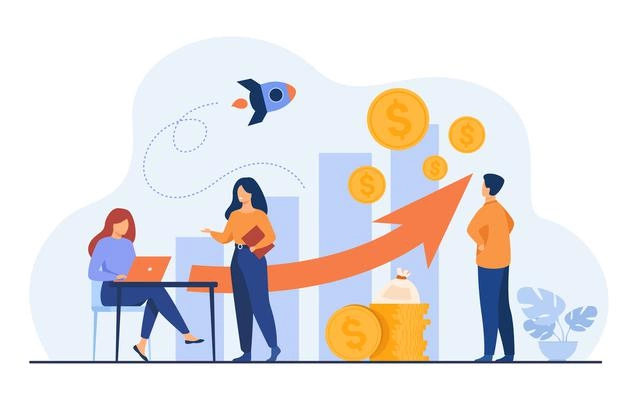

<a href='https://www.freepik.com/vectors/abstract'>Abstract vector created by vectorjuice - www.freepik.com</a>

**Overview of the dataset:**

This data is about sales with prices, status, products, etc.

This dataset contains 2823 rows and 25 columns.

You can see this dataset in link: https://www.kaggle.com/kyanyoga/sample-sales-data


**Dictionary of the dataset:**

* **ORDERNUMBER**:  Unique ID for each order made by a customer, number invoice;
* **QUANTITYORDERED**: Quantity of the products sold in the invoice, specified by ORDERNUMBER;
* **PRICEEACH**: Price each product;	
* **ORDERLINENUMBER**: 	
* **SALES**: Total value in invoice. (QUANTITYORDERED x PRICEEACH);	
* **ORDERDATE**: purchase date;
* **STATUS**: purchase status (canceled, in process, on hold, resolved, Disputed or shipped);
* **QTR_ID**:[ 1,2,3,4 ] for the Quarters of the Year;	
* **MONTH_ID**: purshase month;
* **YEAR_ID**: purshase year;
* **PRODUCTLINE**: Type of product; 	
* **MSRP**: Manufacturer's Suggested Retail Price, is the price that a manufacturer recommends for stores to sell their product. Some retailers may also refer to the MSRP as the "list price."	
* **PRODUCTCODE**: code of the product; 	
* **CUSTOMERNAME**: Name of the customer of the considered order; 	
* **PHONE**: client phone;	
* **ADDRESSLINE1**: Client adress;	
* **ADDRESSLINE2**: Client adress;
* **CITY**: purchase city;	
* **STATE**: purchase state;	
* **POSTALCODE**: number of postalcode;	
* **COUNTRY**: purchase country;
* **TERRITORY**: purshase territory;
* **CONTACTLASTNAME**: Fist client name;	
* **CONTACTFIRSTNAME**: Last client name;	
* **DEALSIZE**: Product size.

**Objective**:

The model must learn from the data and be able to make similarities between clients through unsupervised learning Clustering. Furthermore, will be made RFM Score with clients to separate into groups of clients with target "platinum", "gold", "silver", and "bronze", and with the clients "bronze" will be made a Regression Model forecast sales to do campaigns to sale more and rescue this customer. 

## **Notebook**

**Check list:**

1. Import the libraries;
2. Load dataset and informations;
3. First preprocessing and visualization of the dataset;
4. RFM Modeling;
5. K-Means Clustering;
6. Using Purchase Forecasts (Prophet);
7. Regression Model;
8. LightGBM to Regression;
9. Conclusions of the project.

### **Abstract of the project:**

**1. Import the libraries:**

In this first part, it is imported the libraries and frameworks that are used during this project. 

**2. Load dataset and informations:**

Also, it is displayed the data and some characteristics of it, like the number of samples and features, if exist null or NaN values in the dataset, and counts the unique values for each feature.

**3. First preprocessing and visualization of the dataset:**

In the third part, some graphics are made to visualize the dataset for some insights about the problem, for example, the correlation between the features. Besides, some features that aren't necessary are withdrawn.

**4. RFM Modeling:**

In this part, it is applied customer segmentation, where we segmented the clients in groups to identify which client needs attention and predict how much these clients will spend and future makes campaigns to regard this client.

**5. K-Means Clustering:**

In this part, it is applied the Elbow Method to find the number of clusters in the dataset. After that, it is used the K-means to build the clusters and take some important insights of each group.

**6. Using Purchase Forecasts (Prophet):**

In this section, we will catch the clients that need atemption, and do purchase forecasts to offer products with the same price.

**7. Regression Model:**

With the client's group that needs attention, we use this data to predict with Regression how much these clients will spend and future makes campaigns to regard this client.

**8. LightGBM to Regression:**

The same thing will be made to predict how much these clients will spend and future to make campaigns to regard this client but is with algorithm LightGBM.

**9. Conclusions of the project:**

This final part shows a summary of the results that are achieved in each part of the project.

## **Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
    
#date
from datetime import datetime

#images
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
%matplotlib inline

In [ ]:
from pandas_profiling import ProfileReport

In [ ]:
!pip install chart-studio

In [ ]:
import chart_studio as cs
import plotly.offline as po
import plotly.graph_objs as gobj

In [ ]:
!pip install squarify

In [ ]:
import squarify

In [ ]:
from fbprophet import Prophet

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.linear_model import LinearRegression

## **Load Data Set and Informations**

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/mestrado/Sales_Data_Clustering_Kaggle/sales_data_sample.csv', delimiter=',', encoding="cp1252")
data.head()

ORDERNUMBER  QUANTITYORDERED  ...  CONTACTFIRSTNAME  DEALSIZE
0        10107               30  ...              Kwai     Small
1        10121               34  ...              Paul     Small
2        10134               41  ...            Daniel    Medium
3        10145               45  ...             Julie    Medium
4        10159               49  ...             Julie    Medium

[5 rows x 25 columns]

In [ ]:
data.shape

(2823, 25)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


**It's possible to see above that:**
* **There are few null values in  'ADRESSLINE2', 'STATE', 'POSTALCODE', and 'TERRITORY'.**
* **The type of each feature.**

In [ ]:
data.describe()

ORDERNUMBER  QUANTITYORDERED  ...     YEAR_ID         MSRP
count   2823.000000      2823.000000  ...  2823.00000  2823.000000
mean   10258.725115        35.092809  ...  2003.81509   100.715551
std       92.085478         9.741443  ...     0.69967    40.187912
min    10100.000000         6.000000  ...  2003.00000    33.000000
25%    10180.000000        27.000000  ...  2003.00000    68.000000
50%    10262.000000        35.000000  ...  2004.00000    99.000000
75%    10333.500000        43.000000  ...  2004.00000   124.000000
max    10425.000000        97.000000  ...  2005.00000   214.000000

[8 rows x 9 columns]

In [ ]:
# Searching for the client with the highest one-off purchase

data[data['SALES'] == 14082.800000]

ORDERNUMBER  QUANTITYORDERED  ...  CONTACTFIRSTNAME  DEALSIZE
598        10407               76  ...               Sue     Large

[1 rows x 25 columns]

In [ ]:
# Searching for the client with the smallest one-off purchase

data[data['SALES'] == 482.130000]

ORDERNUMBER  QUANTITYORDERED  ...  CONTACTFIRSTNAME  DEALSIZE
2249        10425               11  ...            Janine     Small

[1 rows x 25 columns]

In [ ]:
# Searching for the lines and products with the highest price each.

data[data['PRICEEACH'] == 100.000000]

ORDERNUMBER  QUANTITYORDERED  ...  CONTACTFIRSTNAME  DEALSIZE
4           10159               49  ...             Julie    Medium
7           10188               48  ...            Veysel    Medium
9           10211               41  ...         Dominique    Medium
10          10223               37  ...             Peter    Medium
11          10237               23  ...           Michael     Small
...           ...              ...  ...               ...       ...
2741        10397               36  ...           Annette    Medium
2764        10361               35  ...            Adrian    Medium
2818        10350               20  ...             Diego     Small
2819        10373               29  ...            Pirkko    Medium
2820        10386               43  ...             Diego    Medium

[1304 rows x 25 columns]

In [ ]:
# Searching for the lines and products with the smallest price each.

data[data['PRICEEACH'] == 26.880000]

ORDERNUMBER  QUANTITYORDERED  ...  CONTACTFIRSTNAME  DEALSIZE
1563        10420               45  ...            Adrian     Small

[1 rows x 25 columns]

In [ ]:
# Searching for the lines and products with the highest quantity of the products.

data[data['QUANTITYORDERED'] == 97.000000]

ORDERNUMBER  QUANTITYORDERED  ...  CONTACTFIRSTNAME  DEALSIZE
418        10405               97  ...        Frederique     Large

[1 rows x 25 columns]

In [ ]:
# Searching for the lines and products with the smallest quantity of the products.

data[data['QUANTITYORDERED'] == 6.000000]

ORDERNUMBER  QUANTITYORDERED  ...  CONTACTFIRSTNAME  DEALSIZE
751         10409                6  ...             Wendy     Small
1287        10407                6  ...               Sue     Small

[2 rows x 25 columns]

In [ ]:
#Show values exclusives in each column

for i in data.columns:
    print(f"*****{i}*****")
    display(data[i].value_counts())
    print("---------------------------")
print()

*****ORDERNUMBER*****


10332    18
10386    18
10165    18
10159    18
10168    18
         ..
10242     1
10216     1
10277     1
10387     1
10158     1
Name: ORDERNUMBER, Length: 307, dtype: int64

---------------------------
*****QUANTITYORDERED*****


34    112
21    103
46    101
27    100
45     97
41     97
31     97
26     96
48     94
25     94
29     94
20     93
33     92
22     92
32     91
24     91
38     91
49     91
36     89
44     89
37     87
43     85
39     84
28     82
40     78
42     76
30     75
23     73
35     71
47     70
50     65
55     16
66      5
51      4
15      4
60      3
56      3
59      3
61      3
18      3
76      3
19      3
64      3
10      2
6       2
54      2
70      2
11      2
52      1
58      1
62      1
85      1
13      1
65      1
16      1
12      1
77      1
97      1
Name: QUANTITYORDERED, dtype: int64

---------------------------
*****PRICEEACH*****


100.00    1304
96.34        6
59.87        6
67.14        5
51.93        5
          ... 
89.89        1
99.67        1
92.40        1
71.60        1
84.25        1
Name: PRICEEACH, Length: 1016, dtype: int64

---------------------------
*****ORDERLINENUMBER*****


1     307
2     291
3     270
4     256
5     239
6     221
7     197
8     187
9     165
10    141
11    128
12    110
13     97
14     81
15     56
16     42
17     25
18     10
Name: ORDERLINENUMBER, dtype: int64

---------------------------
*****SALES*****


3003.00    3
1666.70    2
5984.14    2
1030.44    2
2935.15    2
          ..
7140.76    1
2675.05    1
3500.10    1
4285.46    1
2992.00    1
Name: SALES, Length: 2763, dtype: int64

---------------------------
*****ORDERDATE*****


11/14/2003 0:00    38
11/24/2004 0:00    35
11/12/2003 0:00    34
11/17/2004 0:00    32
11/4/2004 0:00     29
                   ..
8/28/2004 0:00      1
2/8/2005 0:00       1
4/20/2004 0:00      1
8/4/2004 0:00       1
4/21/2003 0:00      1
Name: ORDERDATE, Length: 252, dtype: int64

---------------------------
*****STATUS*****


Shipped       2617
Cancelled       60
Resolved        47
On Hold         44
In Process      41
Disputed        14
Name: STATUS, dtype: int64

---------------------------
*****QTR_ID*****


4    1094
1     665
2     561
3     503
Name: QTR_ID, dtype: int64

---------------------------
*****MONTH_ID*****


11    597
10    317
5     252
1     229
2     224
3     212
8     191
12    180
4     178
9     171
7     141
6     131
Name: MONTH_ID, dtype: int64

---------------------------
*****YEAR_ID*****


2004    1345
2003    1000
2005     478
Name: YEAR_ID, dtype: int64

---------------------------
*****PRODUCTLINE*****


Classic Cars        967
Vintage Cars        607
Motorcycles         331
Planes              306
Trucks and Buses    301
Ships               234
Trains               77
Name: PRODUCTLINE, dtype: int64

---------------------------
*****MSRP*****


118    104
99     103
136     80
62      78
68      77
      ... 
109     23
170     22
41      22
71      22
92      22
Name: MSRP, Length: 80, dtype: int64

---------------------------
*****PRODUCTCODE*****


S18_3232    52
S12_1666    28
S10_1949    28
S10_4962    28
S18_1097    28
            ..
S18_2248    22
S18_4933    22
S18_4409    22
S24_2887    22
S24_3969    22
Name: PRODUCTCODE, Length: 109, dtype: int64

---------------------------
*****CUSTOMERNAME*****


Euro Shopping Channel           259
Mini Gifts Distributors Ltd.    180
Australian Collectors, Co.       55
La Rochelle Gifts                53
AV Stores, Co.                   51
                               ... 
Microscale Inc.                  10
Royale Belge                      8
Auto-Moto Classics Inc.           8
Atelier graphique                 7
Boards & Toys Co.                 3
Name: CUSTOMERNAME, Length: 92, dtype: int64

---------------------------
*****PHONE*****


(91) 555 94 44      259
4155551450          180
03 9520 4555         55
40.67.8555           53
6175558555           51
                   ... 
2125551957           10
6175558428            8
(071) 23 67 2555      8
40.32.2555            7
3105552373            3
Name: PHONE, Length: 91, dtype: int64

---------------------------
*****ADDRESSLINE1*****


C/ Moralzarzal, 86              259
5677 Strong St.                 180
636 St Kilda Road                55
67, rue des Cinquante Otages     53
Fauntleroy Circus                51
                               ... 
5290 North Pendale Street        10
Boulevard Tirou, 255              8
16780 Pompton St.                 8
54, rue Royale                    7
4097 Douglas Av.                  3
Name: ADDRESSLINE1, Length: 92, dtype: int64

---------------------------
*****ADDRESSLINE2*****


Level 3        55
Suite 400      48
Level 6        46
Level 15       46
2nd Floor      36
Suite 101      25
Suite 750      20
Floor No. 4    16
Suite 200      10
Name: ADDRESSLINE2, dtype: int64

---------------------------
*****CITY*****


Madrid         304
San Rafael     180
NYC            152
Singapore       79
Paris           70
              ... 
Sevilla         15
Los Angeles     14
Munich          14
Burbank         13
Charleroi        8
Name: CITY, Length: 73, dtype: int64

---------------------------
*****STATE*****


CA               416
MA               190
NY               178
NSW               92
Victoria          78
PA                75
CT                61
BC                48
NH                34
Tokyo             32
NV                29
Isle of Wight     26
Quebec            22
NJ                21
Osaka             20
Queensland        15
Name: STATE, dtype: int64

---------------------------
*****POSTALCODE*****


28034      259
97562      205
10022      152
94217       89
50553       61
          ... 
8010        15
80686       14
WA1 1DP     12
B-6000       8
92561        3
Name: POSTALCODE, Length: 73, dtype: int64

---------------------------
*****COUNTRY*****


USA            1004
Spain           342
France          314
Australia       185
UK              144
Italy           113
Finland          92
Norway           85
Singapore        79
Canada           70
Denmark          63
Germany          62
Sweden           57
Austria          55
Japan            52
Belgium          33
Switzerland      31
Philippines      26
Ireland          16
Name: COUNTRY, dtype: int64

---------------------------
*****TERRITORY*****


EMEA     1407
APAC      221
Japan     121
Name: TERRITORY, dtype: int64

---------------------------
*****CONTACTLASTNAME*****


Freyre      259
Nelson      204
Young       115
Frick        91
Brown        88
           ... 
Hardy        12
Tseng        11
Kuo          10
Cartrain      8
Schmitt       7
Name: CONTACTLASTNAME, Length: 77, dtype: int64

---------------------------
*****CONTACTFIRSTNAME*****


Diego      259
Valarie    257
Julie      117
Michael     84
Sue         84
          ... 
Jesus       13
Thomas      12
Kee         10
Pascale      8
Carine       7
Name: CONTACTFIRSTNAME, Length: 72, dtype: int64

---------------------------
*****DEALSIZE*****


Medium    1384
Small     1282
Large      157
Name: DEALSIZE, dtype: int64

---------------------------



## **Fist data preprocessing and Visualization of the data**

### **Using Pandas Profiling:**

In [ ]:
profile = ProfileReport(data, title='Sales Dataset', html = {'style':{'full_width':True}})


In [ ]:
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### **Using others codes and fixeds**

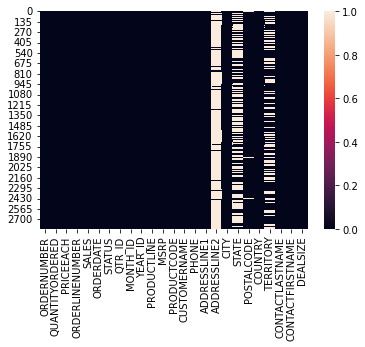

In [ ]:
# See the null samples in the dataset

sns.heatmap(data.isnull())

**There are some null point the features 'ADRESSLINE2', 'STATE', 'POSTALCODE', and 'TERRITORY'.**

In [ ]:
# Counting the null values for each feature

data.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [ ]:
#Dropping the ADDRESSLINE2', 'STATE', 'POSTALCODE' and 'TERRITORY', because there are lots of missing values.

dropping = ['ADDRESSLINE2', 'STATE', 'POSTALCODE', 'TERRITORY']
data.drop(dropping, axis = 1, inplace = True)

In [ ]:
data.head()

ORDERNUMBER  QUANTITYORDERED  ...  CONTACTFIRSTNAME  DEALSIZE
0        10107               30  ...              Kwai     Small
1        10121               34  ...              Paul     Small
2        10134               41  ...            Daniel    Medium
3        10145               45  ...             Julie    Medium
4        10159               49  ...             Julie    Medium

[5 rows x 21 columns]

In [ ]:
data.isnull().sum()

ORDERNUMBER         0
QUANTITYORDERED     0
PRICEEACH           0
ORDERLINENUMBER     0
SALES               0
ORDERDATE           0
STATUS              0
QTR_ID              0
MONTH_ID            0
YEAR_ID             0
PRODUCTLINE         0
MSRP                0
PRODUCTCODE         0
CUSTOMERNAME        0
PHONE               0
ADDRESSLINE1        0
CITY                0
COUNTRY             0
CONTACTLASTNAME     0
CONTACTFIRSTNAME    0
DEALSIZE            0
dtype: int64

**There aren't null samples.**

In [ ]:
# Checking if there exist duplicate samples

data.duplicated().sum()

0

**There aren't duplicate samples.**

**<font size="4">Distribution of numerical data</font>**

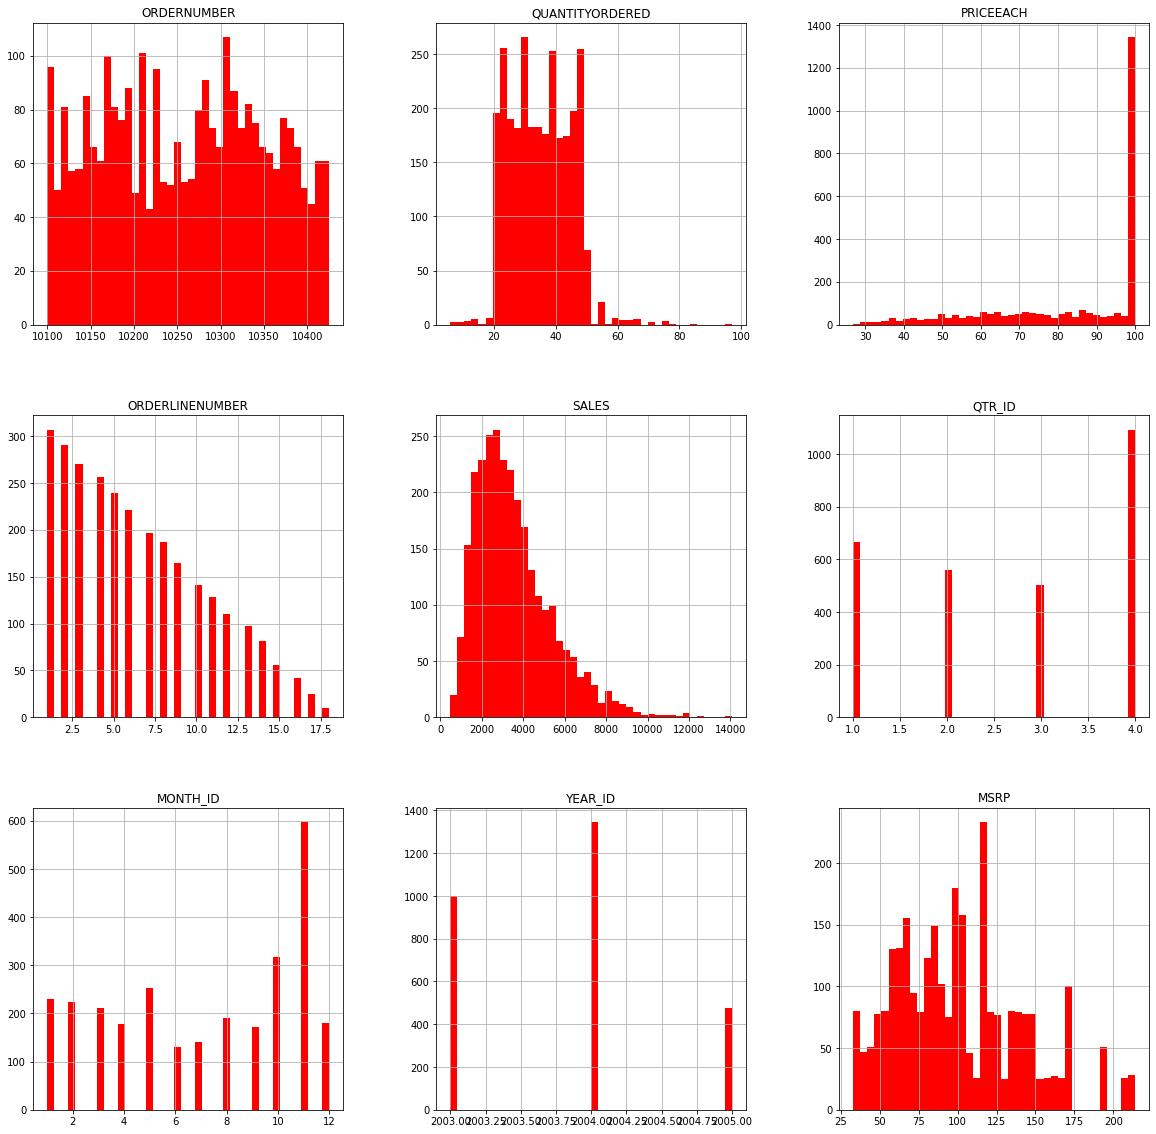

In [ ]:
data.hist(bins = 40, figsize=(20,20), color = 'r'); # bins means the interval between the numeric ranges

**Obs.:**
- We can see that 'QUANTITYORDERED' is more between 20 and 50;
- The 'PRICEEACH' is highest in 100 value;
- The 'ORDERLINENUMBER' decrease with value increase;
- The attribute'SALES' is more between 1000 and 5000;
- The month that there was more sales in november(11);
- The year that there was more sales in 2004; 

**<font size="4">Correlation between the features</font>**

Computing the pairwise correlation of columns to prove if the insights above are real or not.

**Informations about correlations(r):**

* Correlation is a statistic that measures the degree to which two variables move in relation to each other.
* The correlation is closer to +1 the more the data are related.
* Negative correlation is a relationship between two variables in which one variable increases as the other decreases, and vice versa.

**Strength of Relationship**

r < 0.3 ------------> None or very weak

0.3 < r < 0.5 ----> Weak

0.5 < r < 0.7 ----> Moderate

r > 0.7 -------------> Strong

The correlation can be seen in the pandas profiling too. Below it's plotting a heatmap with data value in each cell.

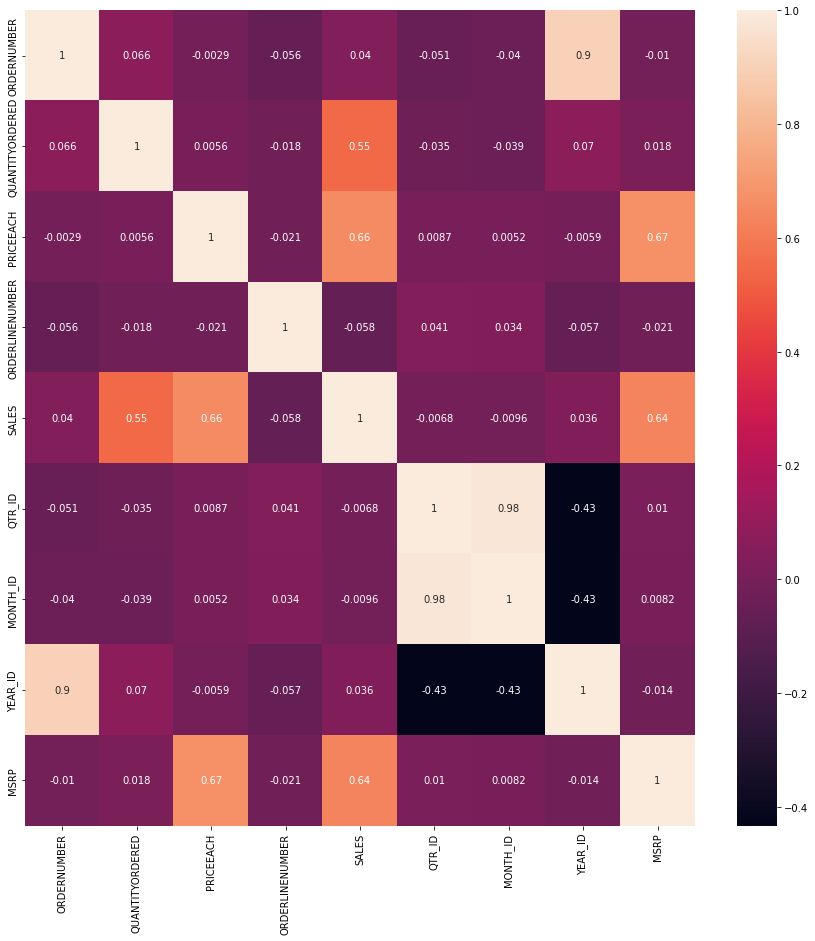

In [ ]:
correlations = data.corr()

plt.figure(figsize=(15, 15)) #f, ax = plt.subplots(figsize= (15, 15))
sns.heatmap(correlations, annot = True);

**Strong correlations found on the heatmap:**

* 'QTR_ID' and 'MONTH_ID' (r = 0.98)
* 'YEAR_ID' and 'ORDERNUMBER' (r = 0.90)
* 'Vlr MargemQSUM' and 'Vlr PeçasQSUM'(r = 0.83)

**Moderate correlations:**

* 'PRICEEACH' and 'MSRP' (r = 0.67)
* 'SALES' and 'PRICEEACH'(r = 0.66)
* 'SALES' and 'MSRP' (r = 0.64)
* 'QUANTITYORDERED' and 'SALES'(r = 0.55)

**Negative correlations:**

* 'YEAR_ID' and 'QTR_ID' (r = -0.43)
* 'YEAR_ID' and 'MONTH_ID' (r = -0.43)

(''r'' means correlation.)

In [ ]:
# Convert order date to datetime format
data['ORDERDATE'] = pd.to_datetime(data['ORDERDATE'])

In [ ]:
data.head(1)

ORDERNUMBER  QUANTITYORDERED  ...  CONTACTFIRSTNAME  DEALSIZE
0        10107               30  ...              Kwai     Small

[1 rows x 21 columns]

In [ ]:
#Customer distribution by country

country_cust_data=data[['COUNTRY','CUSTOMERNAME']].drop_duplicates()
country_cust_data.groupby(['COUNTRY'])['CUSTOMERNAME'].aggregate('count').reset_index().sort_values('CUSTOMERNAME', ascending=False)

COUNTRY  CUSTOMERNAME
18          USA            35
6        France            12
17           UK             5
14        Spain             5
0     Australia             5
5       Finland             3
7       Germany             3
11       Norway             3
3        Canada             3
9         Italy             3
4       Denmark             2
1       Austria             2
10        Japan             2
13    Singapore             2
15       Sweden             2
2       Belgium             2
8       Ireland             1
12  Philippines             1
16  Switzerland             1

In [ ]:
country_cust_data

COUNTRY                        CUSTOMERNAME
0          USA                   Land of Toys Inc.
1       France                  Reims Collectables
2       France                     Lyon Souveniers
3          USA                   Toys4GrownUps.com
4          USA            Corporate Gift Ideas Co.
..         ...                                 ...
483  Australia        Australian Collectables, Ltd
554        USA                    Gift Ideas Corp.
567    Germany  Bavarian Collectables Imports, Co.
571    Belgium                        Royale Belge
937        USA             Auto-Moto Classics Inc.

[92 rows x 2 columns]

In [ ]:
#Customer distribution by city

city_cust_data=data[['CITY','CUSTOMERNAME']].drop_duplicates()
city_cust_data.groupby(['CITY'])['CUSTOMERNAME'].aggregate('count').reset_index().sort_values('CUSTOMERNAME', ascending=False)

CITY  CUSTOMERNAME
42           NYC             5
52         Paris             3
34        Madrid             3
7     Brickhaven             3
30        London             2
..           ...           ...
33          Lyon             1
35   Makati City             1
1      Allentown             1
37     Marseille             1
72  White Plains             1

[73 rows x 2 columns]

In [ ]:
city_cust_data

CITY                        CUSTOMERNAME
0              NYC                   Land of Toys Inc.
1            Reims                  Reims Collectables
2            Paris                     Lyon Souveniers
3         Pasadena                   Toys4GrownUps.com
4    San Francisco            Corporate Gift Ideas Co.
..             ...                                 ...
483   Glen Waverly        Australian Collectables, Ltd
554       Glendale                    Gift Ideas Corp.
567         Munich  Bavarian Collectables Imports, Co.
571      Charleroi                        Royale Belge
937     Brickhaven             Auto-Moto Classics Inc.

[92 rows x 2 columns]

In [ ]:
data.QUANTITYORDERED.min()

6

In [ ]:
data.to_csv('data.csv')

##**RFM Modeling**

### **Customer classification order:**

**Loyalty Level**  — Platinum, Gold, Silver, and Bronze;

### **Other Loyalty Level**:

**Loyal** and **Champion** — Better customers

**Potential** — high potential to enter our loyal customer segments, why not throw in some freebies on their next purchase to show that you value them!

**Promising** — showing promising signs with quantity and value of their purchase but it has been a while since they last bought sometime from you. Let’s target them with their wishlist items and a limited time offer discount.

**Needs Attention** — made some initial purchase but have not seen them since. Was it a bad customer experience? Or product-market fit? Let’s spend some resource build our brand awareness with them.

**Require Activation** — Poorest performers of our RFM model. They might have went with our competitors for now and will require a different activation strategy to win them back.

In [ ]:
data['ORDERDATE'].max()

Timestamp('2005-05-31 00:00:00')

In [ ]:
data.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'CITY', 'COUNTRY', 'CONTACTLASTNAME',
       'CONTACTFIRSTNAME', 'DEALSIZE'],
      dtype='object')

In [ ]:
#Recency = Latest Date - Last Inovice Data, 
#Frequency = count of invoice number of sales, 
#Monetary = Sum of sales for each customer

import datetime as dt

#Set Latest date 2005-05-31
#This is to calculate the number of days from recent purchase

Latest_Date = dt.datetime(2005,5,31)

#Create RFM Modelling scores for each customer
RFMScores = data.groupby('CUSTOMERNAME').agg({'ORDERDATE': lambda x: (Latest_Date - x.max()).days, 'ORDERNUMBER': lambda x: len(x), 'SALES': lambda x: x.sum()})

#Convert Invoice Date into type int
RFMScores['ORDERDATE'] = RFMScores['ORDERDATE'].astype(int)

#Rename column names to Recency, Frequency and Monetary
RFMScores.rename(columns={'ORDERDATE': 'Recency', 
                         'ORDERNUMBER': 'Frequency', 
                         'SALES': 'Monetary'}, inplace=True)

RFMScores.reset_index().head()

CUSTOMERNAME  Recency  Frequency   Monetary
0           AV Stores, Co.      195         51  157807.81
1             Alpha Cognac       64         20   70488.44
2       Amica Models & Co.      264         26   94117.26
3  Anna's Decorations, Ltd       83         46  153996.13
4        Atelier graphique      187          7   24179.96

In [ ]:
RFMScores.shape

(92, 3)

In [ ]:
RFMScores.reset_index().describe()

Recency   Frequency       Monetary
count   92.000000   92.000000      92.000000
mean   181.826087   30.684783  109050.313587
std    131.420524   30.934503  110308.612808
min      0.000000    3.000000    9129.350000
25%     80.250000   19.750000   70129.432500
50%    185.000000   26.000000   86522.610000
75%    229.250000   32.500000  120575.875000
max    508.000000  259.000000  912294.110000

In [ ]:
RFMScores['Monetary'].max()

912294.11

In [ ]:
RFMScores.reset_index()[RFMScores.reset_index()['Monetary'] == 912294.11]

CUSTOMERNAME  Recency  Frequency   Monetary
33  Euro Shopping Channel        0        259  912294.11

In [ ]:
RFMScores['Recency'].min()

0

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



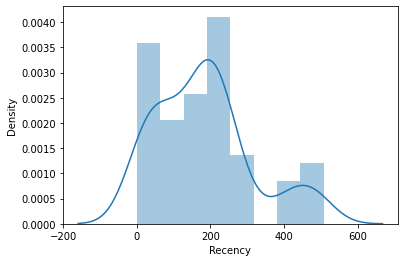

In [ ]:
#Recency distribution plot

x = RFMScores['Recency']

ax = sns.distplot(x)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



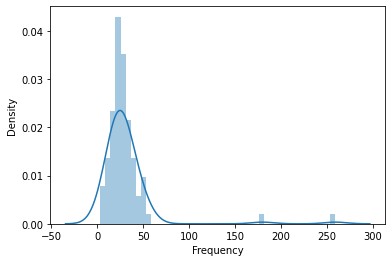

In [ ]:
#Frequency distribution plot, taking observations which have frequency less than 1000

x = RFMScores['Frequency']

ax = sns.distplot(x);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


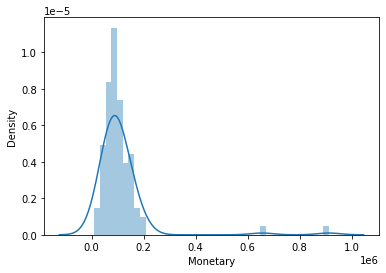

In [ ]:
#Monateray distribution plot

x = RFMScores['Monetary']

ax = sns.distplot(x)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


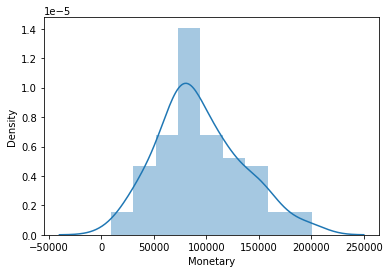

In [ ]:
#Monateray distribution plot, taking observations which have monetary value less than 500000

x = RFMScores.query('Monetary < 500000')['Monetary']

ax = sns.distplot(x)

In [ ]:
#Split into four segments using quantiles

quantiles = RFMScores.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()

In [ ]:
quantiles

{'Frequency': {0.25: 19.75, 0.5: 26.0, 0.75: 32.5},
 'Monetary': {0.25: 70129.4325, 0.5: 86522.61, 0.75: 120575.875},
 'Recency': {0.25: 80.25, 0.5: 185.0, 0.75: 229.25}}

In [ ]:
#Functions to create R, F and M segments
def RScoring(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
def FnMScoring(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [ ]:
#Calculate Add R, F and M segment value columns in the existing dataset to show R, F and M segment values

RFMScores['R'] = RFMScores['Recency'].apply(RScoring, args=('Recency',quantiles,))
RFMScores['F'] = RFMScores['Frequency'].apply(FnMScoring, args=('Frequency',quantiles,))
RFMScores['M'] = RFMScores['Monetary'].apply(FnMScoring, args=('Monetary',quantiles,))
RFMScores.head()

Recency  Frequency   Monetary  R  F  M
CUSTOMERNAME                                                   
AV Stores, Co.               195         51  157807.81  3  1  1
Alpha Cognac                  64         20   70488.44  1  3  3
Amica Models & Co.           264         26   94117.26  4  3  2
Anna's Decorations, Ltd       83         46  153996.13  2  1  1
Atelier graphique            187          7   24179.96  3  4  4

In [ ]:
#Calculate and Add RFMGroup value column showing combined concatenated score of RFM

RFMScores['RFMGroup'] = RFMScores.R.map(str) + RFMScores.F.map(str) + RFMScores.M.map(str)

#Calculate and Add RFMScore value column showing total sum of RFMGroup values

RFMScores['RFMScore'] = RFMScores[['R', 'F', 'M']].sum(axis = 1)
RFMScores.head()

Recency  Frequency   Monetary  ...  M  RFMGroup  RFMScore
CUSTOMERNAME                                            ...                       
AV Stores, Co.               195         51  157807.81  ...  1       311         5
Alpha Cognac                  64         20   70488.44  ...  3       133         7
Amica Models & Co.           264         26   94117.26  ...  2       432         9
Anna's Decorations, Ltd       83         46  153996.13  ...  1       211         4
Atelier graphique            187          7   24179.96  ...  4       344        11

[5 rows x 8 columns]

In [ ]:
#Assign Loyalty Level to each customer

Loyalty_Level = ['Platinum', 'Gold', 'Silver', 'Bronze']
Score_cuts = pd.qcut(RFMScores.RFMScore, q = 4, labels = Loyalty_Level)
RFMScores['RFM_Loyalty_Level'] = Score_cuts.values
RFMScores.reset_index().head()

CUSTOMERNAME  Recency  ...  RFMScore  RFM_Loyalty_Level
0           AV Stores, Co.      195  ...         5           Platinum
1             Alpha Cognac       64  ...         7               Gold
2       Amica Models & Co.      264  ...         9             Silver
3  Anna's Decorations, Ltd       83  ...         4           Platinum
4        Atelier graphique      187  ...        11             Bronze

[5 rows x 10 columns]

In [ ]:
#Validate the data for RFMGroup = 111
RFMScores[RFMScores['RFMGroup']=='111'].sort_values('Monetary', ascending=False).reset_index().head(10)

CUSTOMERNAME  Recency  ...  RFMScore  RFM_Loyalty_Level
0         Euro Shopping Channel        0  ...         3           Platinum
1  Mini Gifts Distributors Ltd.        2  ...         3           Platinum
2             La Rochelle Gifts        0  ...         3           Platinum
3     The Sharp Gifts Warehouse       39  ...         3           Platinum
4     Souveniers And Things Co.        2  ...         3           Platinum
5         Salzburg Collectables       14  ...         3           Platinum
6      Danish Wholesale Imports       46  ...         3           Platinum
7           L'ordine Souveniers       21  ...         3           Platinum
8            Reims Collectables       62  ...         3           Platinum

[9 rows x 10 columns]

In [ ]:
RFMScores[RFMScores['RFM_Loyalty_Level']=='Bronze']

Recency  ...  RFM_Loyalty_Level
CUSTOMERNAME                                 ...                   
Atelier graphique                       187  ...             Bronze
Auto Assoc. & Cie.                      232  ...             Bronze
Bavarian Collectables Imports, Co.      258  ...             Bronze
CAF Imports                             438  ...             Bronze
Cambridge Collectables Co.              388  ...             Bronze
Clover Collections, Co.                 257  ...             Bronze
Daedalus Designs Imports                465  ...             Bronze
Diecast Collectables                    400  ...             Bronze
Double Decker Gift Stores, Ltd          495  ...             Bronze
Iberia Gift Imports, Corp.              237  ...             Bronze
Men 'R' US Retailers, Ltd.              508  ...             Bronze
Microscale Inc.                         209  ...             Bronze
Online Mini Collectables                263  ...             Bronze
Osaka Souveniers Co.                    413  ...             Bronze
Signal Collectibles Ltd.                476  ...             Bronze
Super Scale Inc.                        392  ...             Bronze
West Coast Collectables Co.             488  ...             Bronze

[17 rows x 9 columns]

**Organization of the RFM_Loyalty_Level**

* Platinum have 3, 4 and 5 RFMs
* Gold have 6, 7 and 8 RFMs
* Silver have 9 and 10 RFMs
* Bronze have 11 and 12 RFMs

In [ ]:
#Recency Vs Frequency
graph = RFMScores.query("Monetary < 500000 and Frequency < 200")

plot_data = [
    gobj.Scatter(
        x=graph.query("RFM_Loyalty_Level == 'Bronze'")['Recency'],
        y=graph.query("RFM_Loyalty_Level == 'Bronze'")['Frequency'],
        mode='markers',
        name='Bronze',
        marker= dict(size= 7,
            line= dict(width=1),
            color= 'blue',
            opacity= 0.8
           )
    ),
        gobj.Scatter(
        x=graph.query("RFM_Loyalty_Level == 'Silver'")['Recency'],
        y=graph.query("RFM_Loyalty_Level == 'Silver'")['Frequency'],
        mode='markers',
        name='Silver',
        marker= dict(size= 9,
            line= dict(width=1),
            color= 'green',
            opacity= 0.5
           )
    ),
        gobj.Scatter(
        x=graph.query("RFM_Loyalty_Level == 'Gold'")['Recency'],
        y=graph.query("RFM_Loyalty_Level == 'Gold'")['Frequency'],
        mode='markers',
        name='Gold',
        marker= dict(size= 11,
            line= dict(width=1),
            color= 'red',
            opacity= 0.9
           )
    ),
    gobj.Scatter(
        x=graph.query("RFM_Loyalty_Level == 'Platinum'")['Recency'],
        y=graph.query("RFM_Loyalty_Level == 'Platinum'")['Frequency'],
        mode='markers',
        name='Platinum',
        marker= dict(size= 13,
            line= dict(width=1),
            color= 'black',
            opacity= 0.9
           )
    ),
]

plot_layout = gobj.Layout(
        yaxis= {'title': "Frequency"},
        xaxis= {'title': "Recency"},
        title='Segments'
    )
fig = gobj.Figure(data=plot_data, layout=plot_layout)
po.iplot(fig)

#Frequency Vs Monetary
graph = RFMScores.query("Monetary < 500000 and Frequency < 200")

plot_data = [
    gobj.Scatter(
        x=graph.query("RFM_Loyalty_Level == 'Bronze'")['Frequency'],
        y=graph.query("RFM_Loyalty_Level == 'Bronze'")['Monetary'],
        mode='markers',
        name='Bronze',
        marker= dict(size= 7,
            line= dict(width=1),
            color= 'blue',
            opacity= 0.8
           )
    ),
        gobj.Scatter(
        x=graph.query("RFM_Loyalty_Level == 'Silver'")['Frequency'],
        y=graph.query("RFM_Loyalty_Level == 'Silver'")['Monetary'],
        mode='markers',
        name='Silver',
        marker= dict(size= 9,
            line= dict(width=1),
            color= 'green',
            opacity= 0.5
           )
    ),
        gobj.Scatter(
        x=graph.query("RFM_Loyalty_Level == 'Gold'")['Frequency'],
        y=graph.query("RFM_Loyalty_Level == 'Gold'")['Monetary'],
        mode='markers',
        name='Gold',
        marker= dict(size= 11,
            line= dict(width=1),
            color= 'red',
            opacity= 0.9
           )
    ),
    gobj.Scatter(
        x=graph.query("RFM_Loyalty_Level == 'Platinum'")['Frequency'],
        y=graph.query("RFM_Loyalty_Level == 'Platinum'")['Monetary'],
        mode='markers',
        name='Platinum',
        marker= dict(size= 13,
            line= dict(width=1),
            color= 'black',
            opacity= 0.9
           )
    ),
]

plot_layout = gobj.Layout(
        yaxis= {'title': "Monetary"},
        xaxis= {'title': "Frequency"},
        title='Segments'
    )
fig = gobj.Figure(data=plot_data, layout=plot_layout)
po.iplot(fig)

#Recency Vs Monetary
graph = RFMScores.query("Monetary < 500000 and Frequency < 200")

plot_data = [
    gobj.Scatter(
        x=graph.query("RFM_Loyalty_Level == 'Bronze'")['Recency'],
        y=graph.query("RFM_Loyalty_Level == 'Bronze'")['Monetary'],
        mode='markers',
        name='Bronze',
        marker= dict(size= 7,
            line= dict(width=1),
            color= 'blue',
            opacity= 0.8
           )
    ),
        gobj.Scatter(
        x=graph.query("RFM_Loyalty_Level == 'Silver'")['Recency'],
        y=graph.query("RFM_Loyalty_Level == 'Silver'")['Monetary'],
        mode='markers',
        name='Silver',
        marker= dict(size= 9,
            line= dict(width=1),
            color= 'green',
            opacity= 0.5
           )
    ),
        gobj.Scatter(
        x=graph.query("RFM_Loyalty_Level == 'Gold'")['Recency'],
        y=graph.query("RFM_Loyalty_Level == 'Gold'")['Monetary'],
        mode='markers',
        name='Gold',
        marker= dict(size= 11,
            line= dict(width=1),
            color= 'red',
            opacity= 0.9
           )
    ),
    gobj.Scatter(
        x=graph.query("RFM_Loyalty_Level == 'Platinum'")['Recency'],
        y=graph.query("RFM_Loyalty_Level == 'Platinum'")['Monetary'],
        mode='markers',
        name='Platinum',
        marker= dict(size= 13,
            line= dict(width=1),
            color= 'black',
            opacity= 0.9
           )
    ),
]

plot_layout = gobj.Layout(
        yaxis= {'title': "Monetary"},
        xaxis= {'title': "Recency"},
        title='Segments'
    )
fig = gobj.Figure(data=plot_data, layout=plot_layout)
po.iplot(fig)

In [ ]:
# Calculate average values for each RFM_Level, and return a size of each segment 
rfm_level_agg = RFMScores.groupby('RFM_Loyalty_Level').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'count']
}).round(1)
# Print the aggregated dataset
print(rfm_level_agg)

                  Recency Frequency  Monetary      
                     mean      mean      mean count
RFM_Loyalty_Level                                  
Platinum             84.0      54.3  193532.1    26
Gold                147.6      26.6   95359.4    29
Silver              207.9      19.6   67768.8    20
Bronze              359.2      14.6   51764.5    17


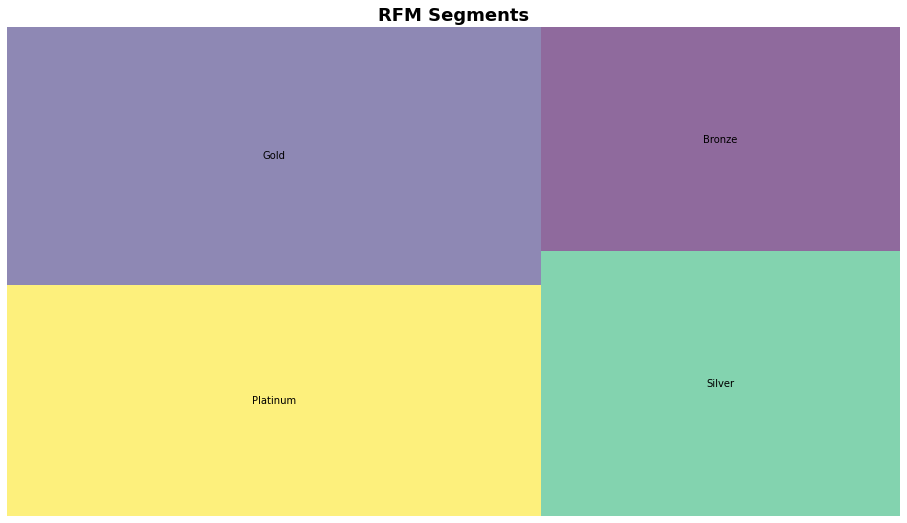

In [ ]:
#rfm_level_agg.columns = rfm_level_agg.columns.droplevel()
rfm_level_agg.columns = ['Recencymean','Frequencymean','Monetarymean', 'count']
#Create our plot and resize it.
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 9)
squarify.plot(sizes=rfm_level_agg['count'], 
              label=['Platinum',
                     'Gold',
                     'Silver',
                     'Bronze'], alpha=.6 )
plt.title("RFM Segments",fontsize=18,fontweight="bold")
plt.axis('off')
plt.show()

In [ ]:
display(RFMScores['RFMScore'].value_counts())

12    11
8     11
7     11
10    10
9     10
4      9
3      9
5      8
6      7
11     6
Name: RFMScore, dtype: int64

**We have:**
* 26 Platinum;
* 29 Gold;
* 20 Silver;
* 17 Bronze

In [ ]:
for i in RFMScores.columns:
    print(f"****{i}****")
    display(RFMScores[i].value_counts())
    print("______________________________________")
print()

****Recency****


207    3
0      2
145    2
183    2
179    2
      ..
460    1
111    1
208    1
465    1
62     1
Name: Recency, Length: 79, dtype: int64

______________________________________
****Frequency****


26     9
20     5
25     5
15     5
32     4
23     4
27     3
19     3
21     3
22     3
41     3
29     3
30     3
24     2
31     2
34     2
36     2
14     2
13     2
40     2
46     2
48     2
8      2
18     2
17     1
16     1
12     1
11     1
10     1
7      1
259    1
55     1
35     1
38     1
39     1
43     1
49     1
51     1
180    1
53     1
3      1
Name: Frequency, dtype: int64

______________________________________
****Monetary****


108951.13    1
81577.98     1
82751.08     1
912294.11    1
74204.79     1
            ..
57197.96     1
118008.27    1
93170.66     1
654858.06    1
48048.46     1
Name: Monetary, Length: 92, dtype: int64

______________________________________
****R****


4    23
3    23
2    23
1    23
Name: R, dtype: int64

______________________________________
****F****


3    31
4    23
1    23
2    15
Name: F, dtype: int64

______________________________________
****M****


4    23
3    23
2    23
1    23
Name: M, dtype: int64

______________________________________
****RFMGroup****


444    11
111     9
333     8
211     7
244     6
133     6
311     4
222     4
332     4
122     3
422     3
434     2
322     2
433     2
344     2
232     2
432     2
233     2
443     2
212     1
132     1
134     1
112     1
121     1
411     1
343     1
334     1
223     1
321     1
143     1
Name: RFMGroup, dtype: int64

______________________________________
****RFMScore****


12    11
8     11
7     11
10    10
9     10
4      9
3      9
5      8
6      7
11     6
Name: RFMScore, dtype: int64

______________________________________
****RFM_Loyalty_Level****


Gold        29
Platinum    26
Silver      20
Bronze      17
Name: RFM_Loyalty_Level, dtype: int64

______________________________________



In [ ]:
RFMScores.head()

Recency  Frequency  ...  RFMScore  RFM_Loyalty_Level
CUSTOMERNAME                                 ...                             
AV Stores, Co.               195         51  ...         5           Platinum
Alpha Cognac                  64         20  ...         7               Gold
Amica Models & Co.           264         26  ...         9             Silver
Anna's Decorations, Ltd       83         46  ...         4           Platinum
Atelier graphique            187          7  ...        11             Bronze

[5 rows x 9 columns]

In [ ]:
# Define other rfm_level function
def rfm_level(df):
    if df['RFMScore'] >= 11:
        return 'Require Activation'
    elif ((df['RFMScore'] >= 9) and (df['RFMScore'] <= 10)):
        return 'Needs Attention'
    elif ((df['RFMScore'] >= 7) and (df['RFMScore'] <= 8)):
        return 'Promising'
    elif ((df['RFMScore'] >= 6) and (df['RFMScore'] < 7)):
        return 'Potential'
    elif ((df['RFMScore'] >= 5) and (df['RFMScore'] <= 6)):
        return 'Loyal'
    else:
        return 'Champions'
# Create a new variable RFM_Level
RFMScores['RFM_Level'] = RFMScores.apply(rfm_level, axis=1)
# Print the header with top 5 rows to the console
RFMScores.head()

Recency  ...           RFM_Level
CUSTOMERNAME                      ...                    
AV Stores, Co.               195  ...               Loyal
Alpha Cognac                  64  ...           Promising
Amica Models & Co.           264  ...     Needs Attention
Anna's Decorations, Ltd       83  ...           Champions
Atelier graphique            187  ...  Require Activation

[5 rows x 10 columns]

In [ ]:
RFMScores[RFMScores['RFM_Level'] == 'Champions']

Recency  Frequency  ...  RFM_Loyalty_Level  RFM_Level
CUSTOMERNAME                                      ...                              
Anna's Decorations, Ltd            83         46  ...           Platinum  Champions
Australian Collectors, Co.        183         55  ...           Platinum  Champions
Corporate Gift Ideas Co.           97         41  ...           Platinum  Champions
Danish Wholesale Imports           46         36  ...           Platinum  Champions
Diecast Classics Inc.               1         31  ...           Platinum  Champions
Dragon Souveniers, Ltd.            90         43  ...           Platinum  Champions
Euro Shopping Channel               0        259  ...           Platinum  Champions
Handji Gifts& Co                   38         36  ...           Platinum  Champions
L'ordine Souveniers                21         39  ...           Platinum  Champions
La Rochelle Gifts                   0         53  ...           Platinum  Champions
Mini Gifts Distributors Ltd.        2        180  ...           Platinum  Champions
Muscle Machine Inc                181         48  ...           Platinum  Champions
Reims Collectables                 62         41  ...           Platinum  Champions
Salzburg Collectables              14         40  ...           Platinum  Champions
Scandinavian Gift Ideas            89         38  ...           Platinum  Champions
Souveniers And Things Co.           2         46  ...           Platinum  Champions
Technics Stores Inc.              146         34  ...           Platinum  Champions
The Sharp Gifts Warehouse          39         40  ...           Platinum  Champions

[18 rows x 10 columns]

In [ ]:
# Calculate average values for each RFM_Level, and return a size of each segment 
rfm_level_agg = RFMScores.groupby('RFM_Level').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'count']
}).round(1)
# Print the aggregated dataset
print(rfm_level_agg)

                   Recency Frequency  Monetary      
                      mean      mean      mean count
RFM_Level                                           
Champions             60.8      61.4  222201.3    18
Loyal                136.2      38.1  129026.4     8
Needs Attention      207.9      19.6   67768.8    20
Potential            172.4      31.4  114218.3     7
Promising            139.7      25.1   89358.8    22
Require Activation   359.2      14.6   51764.5    17


In [ ]:
RFMScores.shape

(92, 10)

## **K-Means Clustering**

In [ ]:
#Handle negative and zero values so as to handle infinite numbers during log transformation
def handle_neg_n_zero(num):
    if num <= 0:
        return 1
    else:
        return num
#Apply handle_neg_n_zero function to Recency and Monetary columns 
RFMScores['Recency'] = [handle_neg_n_zero(x) for x in RFMScores.Recency]
RFMScores['Monetary'] = [handle_neg_n_zero(x) for x in RFMScores.Monetary]

#Perform Log transformation to bring data into normal or near normal distribution
Log_Tfd_Data = RFMScores[['Recency', 'Frequency', 'Monetary']].apply(np.log, axis = 1).round(3)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



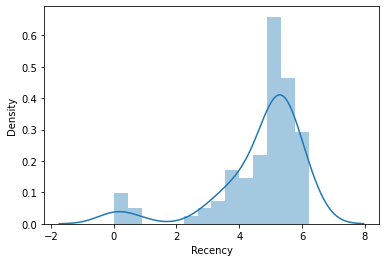

In [ ]:
#Data distribution after data normalization for Recency
Recency_Plot = Log_Tfd_Data['Recency']
ax = sns.distplot(Recency_Plot);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



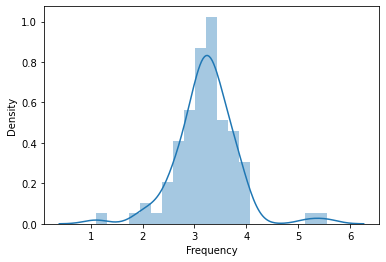

In [ ]:
#Data distribution after data normalization for Frequency
Frequency_Plot = Log_Tfd_Data['Frequency']
ax = sns.distplot(Frequency_Plot);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



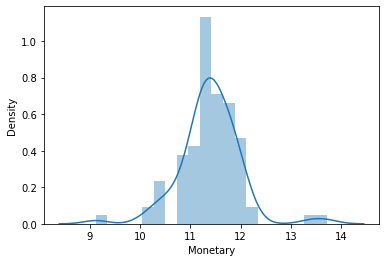

In [ ]:
#Data distribution after data normalization for Monetary
Monetary_Plot = Log_Tfd_Data['Monetary']
ax = sns.distplot(Monetary_Plot);

In [ ]:
from sklearn.preprocessing import StandardScaler

#Bring the data on same scale
scaleobj = StandardScaler()
Scaled_Data = scaleobj.fit_transform(Log_Tfd_Data)

#Transform it back to dataframe
Scaled_Data = pd.DataFrame(Scaled_Data, index = RFMScores.index, columns = Log_Tfd_Data.columns)

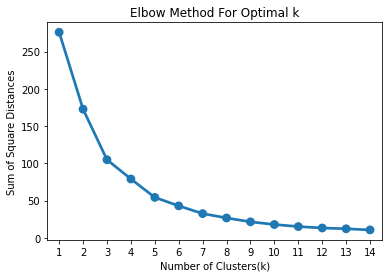

In [ ]:
from sklearn.cluster import KMeans

sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 10000)
    km = km.fit(Scaled_Data)
    sum_of_sq_dist[k] = km.inertia_
    
#Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
#Perform K-Mean Clustering or build the K-Means clustering model
KMean_clust = KMeans(n_clusters= 4, init= 'k-means++', max_iter= 10000)
KMean_clust.fit(Scaled_Data)

#Find the clusters for the observation given in the dataset
RFMScores['Cluster'] = KMean_clust.labels_
RFMScores.head()

Recency  Frequency  ...           RFM_Level  Cluster
CUSTOMERNAME                                 ...                             
AV Stores, Co.               195         51  ...               Loyal        1
Alpha Cognac                  64         20  ...           Promising        2
Amica Models & Co.           264         26  ...     Needs Attention        2
Anna's Decorations, Ltd       83         46  ...           Champions        1
Atelier graphique            187          7  ...  Require Activation        0

[5 rows x 11 columns]

<Figure size 360x360 with 0 Axes>

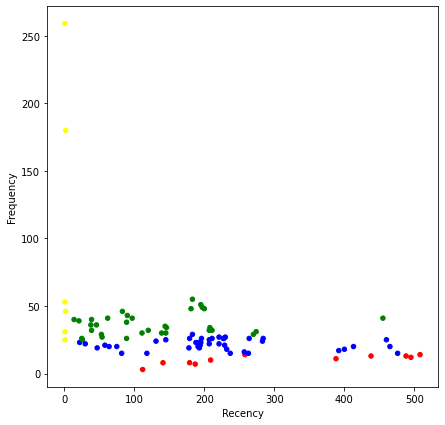

In [ ]:
from matplotlib import pyplot as plt
plt.figure(figsize=(5,5))

##Scatter Plot Frequency Vs Recency
Colors = ["red", "green", "blue", "yellow"]
RFMScores['Color'] = RFMScores['Cluster'].map(lambda p: Colors[p])
ax = RFMScores.plot(    
    kind="scatter", 
    x="Recency", y="Frequency",
    figsize=(7,7),
    c = RFMScores['Color']
);

<Figure size 72x72 with 0 Axes>

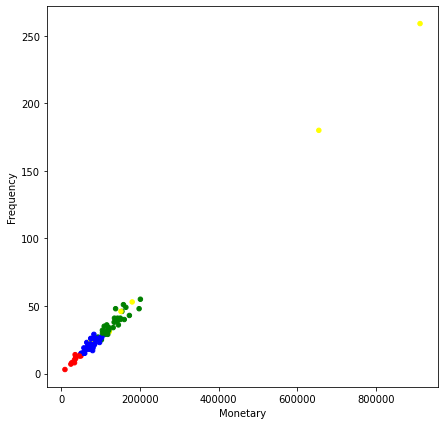

In [ ]:
plt.figure(figsize=(1,1))

##Scatter Plot Frequency Vs Recency
Colors = ["red", "green", "blue", "yellow"]
RFMScores['Color'] = RFMScores['Cluster'].map(lambda p: Colors[p])
ax = RFMScores.plot(    
    kind="scatter", 
    x="Monetary", y="Frequency",
    figsize=(7,7),
    c = RFMScores['Color']
);

<Figure size 360x360 with 0 Axes>

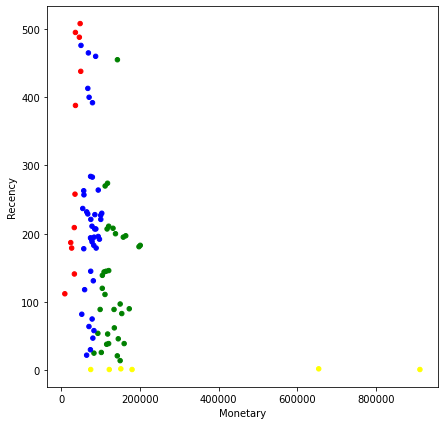

In [ ]:
plt.figure(figsize=(5,5))

##Scatter Plot Frequency Vs Recency
Colors = ["red", "green", "blue", "yellow"]
RFMScores['Color'] = RFMScores['Cluster'].map(lambda p: Colors[p])
ax = RFMScores.plot(    
    kind="scatter", 
    x="Monetary", y="Recency",
    figsize=(7,7),
    c = RFMScores['Color']
);

In [ ]:
RFMScores.head()

Recency  Frequency  ...  Cluster   Color
CUSTOMERNAME                                 ...                 
AV Stores, Co.               195         51  ...        2    blue
Alpha Cognac                  64         20  ...        3  yellow
Amica Models & Co.           264         26  ...        3  yellow
Anna's Decorations, Ltd       83         46  ...        2    blue
Atelier graphique            187          7  ...        0     red

[5 rows x 12 columns]

In [ ]:
RFMScores[RFMScores['Color'] == 'red']

Recency  Frequency  ...  Cluster  Color
CUSTOMERNAME                                            ...                
Atelier graphique                       187          7  ...        0    red
Auto-Moto Classics Inc.                 179          8  ...        0    red
Bavarian Collectables Imports, Co.      258         14  ...        0    red
Boards & Toys Co.                       112          3  ...        0    red
CAF Imports                             438         13  ...        0    red
Cambridge Collectables Co.              388         11  ...        0    red
Double Decker Gift Stores, Ltd          495         12  ...        0    red
Men 'R' US Retailers, Ltd.              508         14  ...        0    red
Microscale Inc.                         209         10  ...        0    red
Royale Belge                            141          8  ...        0    red
Signal Collectibles Ltd.                476         15  ...        0    red
West Coast Collectables Co.             488         13  ...        0    red

[12 rows x 12 columns]

In [ ]:
RFMScores[RFMScores['Color'] == 'green']

Recency  Frequency  ...  Cluster  Color
CUSTOMERNAME                                      ...                
AV Stores, Co.                    195         51  ...        1  green
Anna's Decorations, Ltd            83         46  ...        1  green
Australian Collectors, Co.        183         55  ...        1  green
Auto Canal Petit                   54         27  ...        1  green
Baane Mini Imports                207         32  ...        1  green
Corporate Gift Ideas Co.           97         41  ...        1  green
Corrida Auto Replicas, Ltd        211         32  ...        1  green
Danish Wholesale Imports           46         36  ...        1  green
Dragon Souveniers, Ltd.            90         43  ...        1  green
Gift Depot Inc.                    26         25  ...        1  green
Gifts4AllAges.com                  25         26  ...        1  green
Handji Gifts& Co                   38         36  ...        1  green
L'ordine Souveniers                21         39  ...        1  green
Land of Toys Inc.                 197         49  ...        1  green
Mini Creations Ltd.               144         35  ...        1  green
Muscle Machine Inc                181         48  ...        1  green
Online Diecast Creations Co.      208         34  ...        1  green
Oulu Toy Supplies, Inc.           120         32  ...        1  green
Reims Collectables                 62         41  ...        1  green
Rovelli Gifts                     200         48  ...        1  green
Salzburg Collectables              14         40  ...        1  green
Saveley & Henriot, Co.            455         41  ...        1  green
Scandinavian Gift Ideas            89         38  ...        1  green
Suominen Souveniers               145         30  ...        1  green
Technics Stores Inc.              146         34  ...        1  green
The Sharp Gifts Warehouse          39         40  ...        1  green
Tokyo Collectables, Ltd            39         32  ...        1  green
Toys of Finland, Co.              111         30  ...        1  green
Toys4GrownUps.com                 139         30  ...        1  green
UK Collectables, Ltd.              53         29  ...        1  green
Vida Sport, Ltd                   274         31  ...        1  green

[31 rows x 12 columns]

In [ ]:
RFMScores[RFMScores['Color'] == 'blue']

Recency  Frequency  ...  Cluster  Color
CUSTOMERNAME                                           ...                
Alpha Cognac                            64         20  ...        2   blue
Amica Models & Co.                     264         26  ...        2   blue
Australian Collectables, Ltd            22         23  ...        2   blue
Australian Gift Network, Co            118         15  ...        2   blue
Auto Assoc. & Cie.                     232         18  ...        2   blue
Blauer See Auto, Co.                   207         22  ...        2   blue
Canadian Gift Exchange Network         221         22  ...        2   blue
Classic Gift Ideas, Inc                229         21  ...        2   blue
Classic Legends Inc.                   191         20  ...        2   blue
Clover Collections, Co.                257         16  ...        2   blue
Collectable Mini Designs Co.           460         25  ...        2   blue
Collectables For Less Inc.             131         24  ...        2   blue
Cruz & Sons Co.                        196         26  ...        2   blue
Daedalus Designs Imports               465         20  ...        2   blue
Diecast Collectables                   400         18  ...        2   blue
Enaco Distributors                     188         23  ...        2   blue
FunGiftIdeas.com                        89         26  ...        2   blue
Gift Ideas Corp.                       178         19  ...        2   blue
Heintze Collectables                   221         27  ...        2   blue
Herkku Gifts                           270         29  ...        2   blue
Iberia Gift Imports, Corp.             237         15  ...        2   blue
La Corne D'abondance, Co.              192         23  ...        2   blue
Lyon Souveniers                         75         20  ...        2   blue
Marseille Mini Autos                   145         25  ...        2   blue
Marta's Replicas Co.                   230         27  ...        2   blue
Mini Auto Werke                         82         15  ...        2   blue
Mini Caravy                             47         19  ...        2   blue
Mini Classics                          228         26  ...        2   blue
Mini Wheels Co.                        194         21  ...        2   blue
Motor Mint Distributors Inc.           195         23  ...        2   blue
Norway Gifts By Mail, Co.              283         24  ...        2   blue
Online Mini Collectables               263         15  ...        2   blue
Osaka Souveniers Co.                   413         20  ...        2   blue
Quebec Home Shopping Network            30         22  ...        2   blue
Royal Canadian Collectables, Ltd.      284         26  ...        2   blue
Signal Gift Stores                     183         29  ...        2   blue
Stylish Desk Decors, Co.               179         26  ...        2   blue
Super Scale Inc.                       392         17  ...        2   blue
Tekni Collectables Inc.                 58         21  ...        2   blue
Toms Spezialitten, Ltd                 227         26  ...        2   blue
Vitachrome Inc.                        207         25  ...        2   blue
Volvo Model Replicas, Co               193         19  ...        2   blue
giftsbymail.co.uk                      211         26  ...        2   blue

[43 rows x 12 columns]

In [ ]:
RFMScores[RFMScores['Color'] == 'yellow']

Recency  Frequency  ...  Cluster   Color
CUSTOMERNAME                                      ...                 
Diecast Classics Inc.               1         31  ...        3  yellow
Euro Shopping Channel               1        259  ...        3  yellow
La Rochelle Gifts                   1         53  ...        3  yellow
Mini Gifts Distributors Ltd.        2        180  ...        3  yellow
Petit Auto                          1         25  ...        3  yellow
Souveniers And Things Co.           2         46  ...        3  yellow

[6 rows x 12 columns]

In [ ]:
RFMScores.to_csv('RFMScores_disciplina_cd.csv')

## **Using Purchase Forecasts**

In [ ]:
RFMScores = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/mestrado/Sales_Data_Clustering_Kaggle/RFMScores_disciplina_cd.csv')

In [ ]:
RFMScores.head()

CUSTOMERNAME  Recency  ...  Cluster   Color
0           AV Stores, Co.      195  ...        2    blue
1             Alpha Cognac       64  ...        3  yellow
2       Amica Models & Co.      264  ...        3  yellow
3  Anna's Decorations, Ltd       83  ...        2    blue
4        Atelier graphique      187  ...        0     red

[5 rows x 13 columns]

In [ ]:
RFMScores[RFMScores['RFM_Loyalty_Level']=='Bronze']

CUSTOMERNAME  Recency  ...  Cluster   Color
4                    Atelier graphique      187  ...        0     red
8                   Auto Assoc. & Cie.      232  ...        3  yellow
12  Bavarian Collectables Imports, Co.      258  ...        0     red
15                         CAF Imports      438  ...        0     red
16          Cambridge Collectables Co.      388  ...        0     red
20             Clover Collections, Co.      257  ...        3  yellow
26            Daedalus Designs Imports      465  ...        3  yellow
29                Diecast Collectables      400  ...        3  yellow
30      Double Decker Gift Stores, Ltd      495  ...        0     red
41          Iberia Gift Imports, Corp.      237  ...        3  yellow
49          Men 'R' US Retailers, Ltd.      508  ...        0     red
50                     Microscale Inc.      209  ...        0     red
61            Online Mini Collectables      263  ...        3  yellow
62                Osaka Souveniers Co.      413  ...        3  yellow
73            Signal Collectibles Ltd.      476  ...        0     red
78                    Super Scale Inc.      392  ...        3  yellow
90         West Coast Collectables Co.      488  ...        0     red

[17 rows x 13 columns]

In [ ]:
data[data['CUSTOMERNAME'] == 'Atelier graphique']

ORDERNUMBER  QUANTITYORDERED  ...  CONTACTFIRSTNAME  DEALSIZE
70          10298               39  ...            Carine    Medium
528         10123               26  ...            Carine    Medium
820         10298               32  ...            Carine     Small
857         10123               46  ...            Carine    Medium
1166        10123               34  ...            Carine    Medium
1493        10123               50  ...            Carine     Small
1635        10345               43  ...            Carine     Small

[7 rows x 21 columns]

In [ ]:
Atelier_graphique = data[data['CUSTOMERNAME'] == 'Atelier graphique']
Atelier_graphique = Atelier_graphique[['ORDERDATE', 'SALES']]
Atelier_graphique = Atelier_graphique.reset_index(drop=True)
Atelier_graphique

ORDERDATE    SALES
0 2004-09-27  3757.26
1 2003-05-20  3073.72
2 2004-09-27  1550.72
3 2003-05-20  5161.20
4 2003-05-20  5331.88
5 2003-05-20  2993.50
6 2004-11-25  2311.68

### **Using Prophet**

In [ ]:
Atelier_graphique.columns = ['ds', 'y']
Atelier_graphique

ds        y
0 2004-09-27  3757.26
1 2003-05-20  3073.72
2 2004-09-27  1550.72
3 2003-05-20  5161.20
4 2003-05-20  5331.88
5 2003-05-20  2993.50
6 2004-11-25  2311.68

In [ ]:
model = Prophet()

In [ ]:
model.fit(Atelier_graphique)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 4.


In [ ]:
future = model.make_future_dataframe(periods = 4)

In [ ]:
future

ds
0 2003-05-20
1 2004-09-27
2 2004-11-25
3 2004-11-26
4 2004-11-27
5 2004-11-28
6 2004-11-29

In [ ]:
output = model.predict(future)

In [ ]:
output

ds        trend  ...  multiplicative_terms_upper         yhat
0 2003-05-20  4151.244338  ...                         0.0  4151.244338
1 2004-09-27  2584.053125  ...                         0.0  2584.053125
2 2004-11-25  2397.633202  ...                         0.0  2397.633202
3 2004-11-26  2394.473543  ...                         0.0  2394.473543
4 2004-11-27  2391.313883  ...                         0.0  2391.313883
5 2004-11-28  2388.154223  ...                         0.0  2388.154223
6 2004-11-29  2384.994564  ...                         0.0  2384.994564

[7 rows x 13 columns]

In [ ]:
validation= pd.DataFrame({'ds': Atelier_graphique.ds})
validation['ds']

0   2004-09-27
1   2003-05-20
2   2004-09-27
3   2003-05-20
4   2003-05-20
5   2003-05-20
6   2004-11-25
Name: ds, dtype: datetime64[ns]

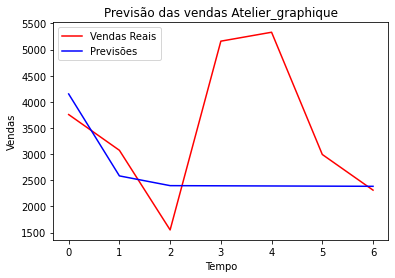

In [ ]:
plt.plot(Atelier_graphique.y, color ='red', label = 'Vendas Reais')
plt.plot(output.yhat, color = 'blue', label = 'Previsões')
plt.title('Previsão das vendas Atelier_graphique')
plt.xlabel('Tempo')
plt.ylabel('Vendas')
plt.legend()
plt.show()

In [ ]:
from sklearn import metrics
print('MAE', metrics.mean_absolute_error(Atelier_graphique.y, output.yhat))
print('MSE', metrics.mean_squared_error(Atelier_graphique.y, output.yhat))
print('RMSE', np.sqrt(metrics.mean_squared_error(Atelier_graphique.y, output.yhat)))
print('R2:', metrics.r2_score(Atelier_graphique.y, output.yhat))

MAE 1159.502475648897
MSE 2540826.027427881
RMSE 1593.9968718375458
R2: -0.5051046120584295


## **Regression Model**

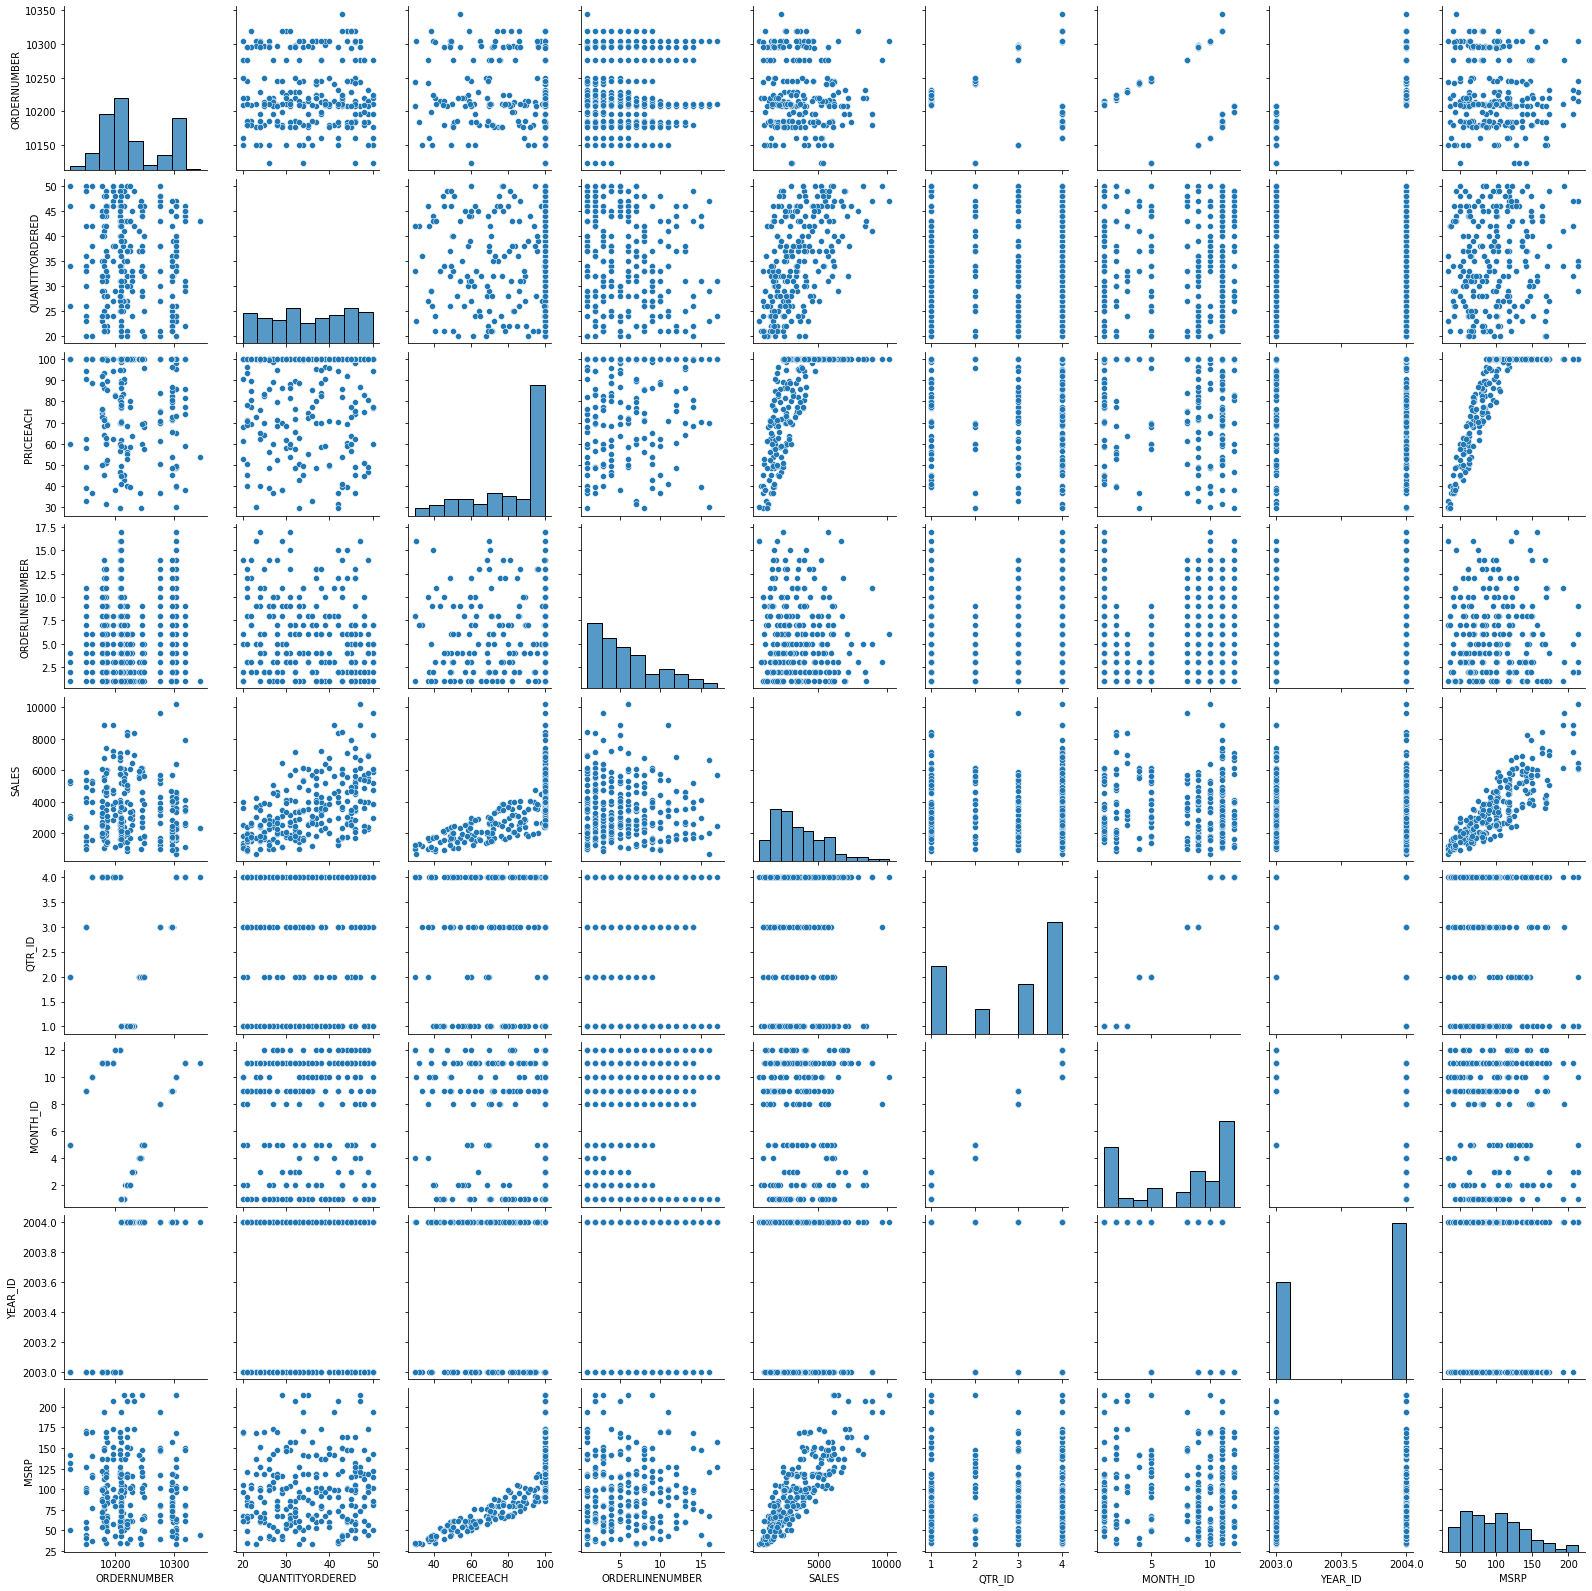

In [ ]:
sns.pairplot(bronze)

**We see that 'SALES' have a well correlation with 'PRICEEACH' and 'MSRP'**

In [ ]:
bronze.head(1)

ORDERNUMBER  QUANTITYORDERED  ...  CONTACTFIRSTNAME  DEALSIZE
0        10180               29  ...           Martine     Small

[1 rows x 21 columns]

In [ ]:
y = bronze['SALES']
X = bronze[['QUANTITYORDERED',	'PRICEEACH',	'ORDERLINENUMBER',  'QTR_ID',	'MONTH_ID',	'YEAR_ID','MSRP']]

In [ ]:
X

QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER  ...  MONTH_ID  YEAR_ID  MSRP
0                 29      86.13                9  ...        11     2003    95
1                 35     100.00                3  ...         1     2004   214
2                 29     100.00                2  ...         3     2004   214
3                 34     100.00                9  ...         5     2004   214
4                 47     100.00                6  ...        10     2004   214
..               ...        ...              ...  ...       ...      ...   ...
243               28      52.14                4  ...        11     2003    49
244               48      44.69                3  ...         1     2004    49
245               32      57.61                3  ...         5     2004    49
246               21      45.19               10  ...         9     2004    49
247               40      50.23                6  ...        11     2003    54

[248 rows x 7 columns]

In [ ]:
y

0       2497.77
1       6075.30
2       6463.23
3       6120.34
4      10172.70
         ...   
243     1459.92
244     2145.12
245     1843.52
246      948.99
247     2009.20
Name: SALES, Length: 248, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train,y_test = train_test_split(X, y, test_size=0.2,random_state=42)

(y_train.shape,y_test.shape)

((198,), (50,))

In [ ]:
X_test, y_test

(     QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER  ...  MONTH_ID  YEAR_ID  MSRP
 33                37     100.00                6  ...        11     2003   118
 6                 23     100.00                2  ...         1     2004   118
 182               43      85.69                2  ...        11     2004    80
 86                26      85.87                8  ...        10     2004   104
 156               45      72.58                2  ...        11     2003    88
 246               21      45.19               10  ...         9     2004    49
 195               48      50.95                1  ...        11     2003    62
 104               33      50.36                9  ...         8     2004    62
 9                 34     100.00                1  ...         1     2004   193
 235               38      82.40                3  ...        12     2003    80
 232               40     100.00                1  ...        10     2004   101
 236               31      86.40        

In [ ]:
lm = LinearRegression()

In [ ]:
lm.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Showing the coefficients for each variable of my X

lm.coef_

array([ 93.73118206,   9.08787485, -12.68613352, -48.8302486 ,
        30.80159014,  51.3733013 ,  32.19412658])

In [ ]:
# To validate the model in the test suite, you need to use the predict() method

y_p = lm.predict(X_test)
y_p

array([4517.32617731, 3145.68230826, 3828.40680615, 2902.35317511,
       4102.90684232,  285.9819458 , 3363.16849813, 1858.14863235,
       6603.97093758, 3296.59394292, 4335.22195049, 2409.01238821,
       4548.07350163, 2918.51740912, 2318.42957978, 1068.03635116,
       1718.26350065, 8332.60139662, 4563.83309654, 4904.73485402,
       6190.01278308, 5154.77589538, 6474.02057784, 4308.28158625,
       2768.01787973, 4705.47192865, 2563.03701552, 4027.71905243,
       5334.77172179, 4360.01000473, 4296.97135945, 1042.77738194,
       2627.69651042, 4361.2269875 , 1444.32317678, 5643.28795148,
        762.42236358, 2511.41929956, 6822.32864526, 1414.18373327,
       3820.17523572, 2516.27388424, 5451.62492159, 4689.56368976,
       6885.34180212, 1632.12074747, 2205.52199957, 2251.52332844,
       3999.16400746, 3742.60552948])

Text(0, 0.5, 'y predict')

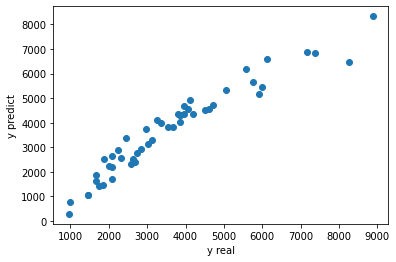

In [ ]:
# Create a scatterplot of actual test values ​​against predicted values.

import matplotlib.pyplot as plt

plt.scatter(y_test, y_p)
plt.xlabel('y real')
plt.ylabel('y predict')

**Evaluating the Model**

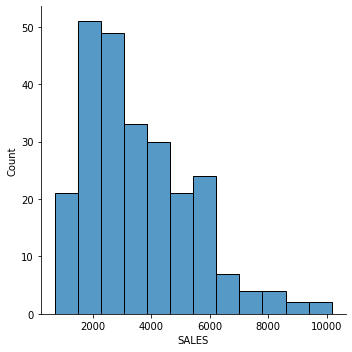

In [ ]:
# distribution of errors

sns.displot(bronze, x="SALES")
plt.tight_layout()

In [ ]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_p))
print('MSE:', metrics.mean_squared_error(y_test, y_p))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_p)))
print('R:', metrics.r2_score(y_test,y_p))

MAE: 407.94261854545607
MSE: 264099.31220398744
RMSE: 513.9059371168886
R: 0.9219048520688952


In [ ]:
# calculating the adjusted R

def adjusted_R(y, ỹ, N):
    adj_r = (1 - ((1 - metrics.r2_score(y, ỹ)) * (len(y) - 1)) / (len(y) - N - 1))   
    return adj_r

print('R-adjust:', adjusted_R(y_test, y_p, X_train.shape[1]))

R-adjust: 0.9088889940803777


**When the column 'ORDERDATE' was disordered, the R was 0.92, and R adjusted was 0.90**

**When the column 'ORDERDATE' was ordered, the R was 0.89, and R adjusted was 0.85**

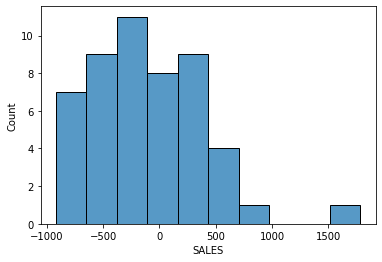

In [ ]:
absolute_error = y_test - y_p

sns.histplot(absolute_error, bins=10)

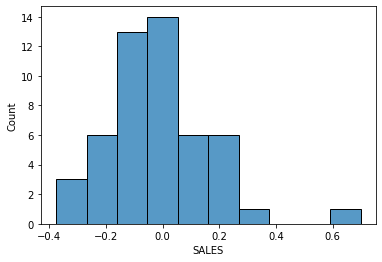

In [ ]:
absolute_error_percent = (y_test - y_p)/y_test

sns.histplot(absolute_error_percent, bins=10)

In [ ]:
coef = pd.DataFrame(lm.coef_, X.columns, columns=['Coefs'])
coef

Coefs
QUANTITYORDERED  93.731182
PRICEEACH         9.087875
ORDERLINENUMBER -12.686134
QTR_ID          -48.830249
MONTH_ID         30.801590
YEAR_ID          51.373301
MSRP             32.194127

In [ ]:
lm.intercept_

-106626.5241696338

### **Normalizing the data**

In [ ]:
bronze = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/mestrado/Sales_Data_Clustering_Kaggle/bronze.csv')
bronze

Unnamed: 0  ORDERNUMBER  ...  CONTACTFIRSTNAME  DEALSIZE
0             0        10123  ...            Carine     Small
1             1        10123  ...            Carine    Medium
2             2        10123  ...            Carine    Medium
3             3        10123  ...            Carine    Medium
4             4        10149  ...               Sue    Medium
..          ...          ...  ...               ...       ...
243         243        10319  ...               Kee    Medium
244         244        10319  ...               Kee    Medium
245         245        10319  ...               Kee     Small
246         246        10319  ...               Kee     Small
247         247        10345  ...            Carine     Small

[248 rows x 22 columns]

In [ ]:
all_numeric = bronze[['QUANTITYORDERED',	'PRICEEACH',	'ORDERLINENUMBER',  'QTR_ID',	'MONTH_ID',	'YEAR_ID','MSRP', 'SALES']]

In [ ]:
scaler = MinMaxScaler()
all_numeric = scaler.fit_transform(all_numeric)

In [ ]:
all_numeric

array([[1.        , 0.430457  , 0.        , ..., 0.        , 0.09392265,
        0.24254861],
       [0.2       , 1.        , 0.0625    , ..., 0.        , 0.50276243,
        0.25101233],
       [0.86666667, 1.        , 0.125     , ..., 0.        , 0.54696133,
        0.47125479],
       ...,
       [0.8       , 0.41896111, 0.1875    , ..., 1.        , 0.16022099,
        0.20088836],
       [0.36666667, 0.74070395, 0.375     , ..., 1.        , 0.19889503,
        0.19402939],
       [0.76666667, 0.34374113, 0.        , ..., 1.        , 0.06077348,
        0.17061225]])

In [ ]:
df = pd.DataFrame(all_numeric, columns=['QUANTITYORDERED',	'PRICEEACH',	'ORDERLINENUMBER',  'QTR_ID',	'MONTH_ID',	'YEAR_ID','MSRP', 'SALES'])

In [ ]:
df

QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER  ...  YEAR_ID      MSRP     SALES
0           1.000000   0.430457           0.0000  ...      0.0  0.093923  0.242549
1           0.200000   1.000000           0.0625  ...      0.0  0.502762  0.251012
2           0.866667   1.000000           0.1250  ...      0.0  0.546961  0.471255
3           0.466667   1.000000           0.1875  ...      0.0  0.596685  0.489263
4           0.466667   1.000000           0.6250  ...      0.0  0.756906  0.493854
..               ...        ...              ...  ...      ...       ...       ...
243         0.833333   0.677689           0.3125  ...      1.0  0.265193  0.293672
244         0.333333   1.000000           0.5000  ...      1.0  0.646409  0.360536
245         0.800000   0.418961           0.1875  ...      1.0  0.160221  0.200888
246         0.366667   0.740704           0.3750  ...      1.0  0.198895  0.194029
247         0.766667   0.343741           0.0000  ...      1.0  0.060773  0.170612

[248 rows x 8 columns]

In [ ]:
y = df['SALES']
X = df[['QUANTITYORDERED',	'PRICEEACH',	'ORDERLINENUMBER',  'QTR_ID',	'MONTH_ID',	'YEAR_ID','MSRP']]

In [ ]:
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size=0.2,random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((198, 7), (50, 7), (198,), (50,))

In [ ]:
lm = LinearRegression()

lm.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Showing the coefficients for each variable of my X

lm.coef_

array([ 0.29553495,  0.0723902 , -0.01184783,  0.00439766,  0.01826393,
        0.017042  ,  0.6256812 ])

In [ ]:
# To validate the model in the test suite, you need to use the predict() method

y_p = lm.predict(X_test)
y_p

array([ 0.00207637,  0.3874933 ,  0.09340613,  0.37294809,  0.28941829,
        0.17109503,  0.43114224,  0.38413511,  0.06291435, -0.09342555,
        0.24467985,  0.41688235,  0.0079245 ,  0.07709745,  0.64701139,
        0.21680648,  0.44122215,  0.48559764,  0.5764501 ,  0.21738828,
        0.2983481 ,  0.41292351,  0.40117647,  0.17749742,  0.35237179,
        0.49786854,  0.20144174,  0.02420766,  0.54320618,  0.18497146,
        0.39682885,  0.34667183,  0.13364375,  0.07179946,  0.253893  ,
        0.51882918,  0.45902441,  0.11615429,  0.25487797,  0.5407445 ,
        0.26117563,  0.26314073,  0.22514362,  0.27251215,  0.10788492,
        0.21784144,  0.32235101,  0.33628546,  0.15608719,  0.3338552 ])

Text(0, 0.5, 'y predict')

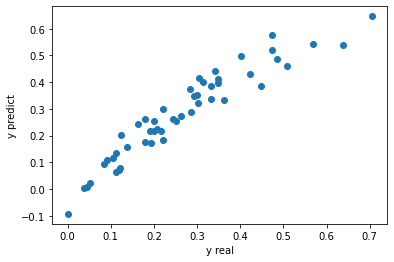

In [ ]:
# Create a scatterplot of actual test values ​​against predicted values.

plt.scatter(y_test, y_p)
plt.xlabel('y real')
plt.ylabel('y predict')

In [ ]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_p))
print('MSE:', metrics.mean_squared_error(y_test, y_p))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_p)))
print('R:', metrics.r2_score(y_test,y_p))

MAE: 0.04407860656006167
MSE: 0.0029631356255776977
RMSE: 0.05443469137946589
R: 0.8793331784593982


In [ ]:
# calculating the adjusted R

def adjusted_R(y, ỹ, N):
    adj_r = (1 - ((1 - metrics.r2_score(y, ỹ)) * (len(y) - 1)) / (len(y) - N - 1))   
    return adj_r

print('R-adjust:', adjusted_R(y_test, y_p, X_train.shape[1]))

R-adjust: 0.8592220415359646


**When we use the predict with X_train**

In [ ]:
y_p = lm.predict(X_train)
y_p

array([ 0.25010055,  0.13131527,  0.23736027,  0.13712972,  0.33394267,
        0.43819054,  0.5694801 ,  0.36341327,  0.1180477 ,  0.34894882,
        0.58619318,  0.09234912,  0.26978707,  0.0528324 ,  0.46865432,
        0.80896185,  0.16308715,  0.0733489 ,  0.10780798,  0.26027912,
        0.27988111,  0.6315042 ,  0.60351058,  0.49507036,  0.24761432,
        0.33477575,  0.17766677,  0.31727565,  0.02707497,  0.0316385 ,
        0.38716357,  0.31233665,  0.27622894,  0.49131622,  0.3189985 ,
        0.51108021,  0.08981628,  0.66111697,  0.15923906,  0.471505  ,
        0.04138167,  0.35195038,  0.22726712,  0.70628045,  0.40221624,
        0.25790787,  0.4178759 ,  0.84780062,  0.23061159,  0.47853888,
        0.44709323, -0.00258327,  0.26634668,  0.19823751,  0.12066224,
        0.12996455,  0.00606015,  0.00262144,  0.32413898,  0.33510477,
        0.48775094,  0.80565294,  0.39901495,  0.24463611,  0.52843758,
        0.40436337,  0.30139794,  0.25178166,  0.23040172,  0.37

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_train, y_p))
print('MSE:', metrics.mean_squared_error(y_train, y_p))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_p)))
print('R:', metrics.r2_score(y_train,y_p))

MAE: 0.04301285652801313
MSE: 0.0032312566384094113
RMSE: 0.056844143395862794
R: 0.9224658541395581


### **Using all the data**

In this section, we use all the data and we separate validation data to test after. 

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/mestrado/Sales_Data_Clustering_Kaggle/data.csv')
data

Unnamed: 0  ORDERNUMBER  ...  CONTACTFIRSTNAME  DEALSIZE
0              0        10107  ...              Kwai     Small
1              1        10121  ...              Paul     Small
2              2        10134  ...            Daniel    Medium
3              3        10145  ...             Julie    Medium
4              4        10159  ...             Julie    Medium
...          ...          ...  ...               ...       ...
2818        2818        10350  ...             Diego     Small
2819        2819        10373  ...            Pirkko    Medium
2820        2820        10386  ...             Diego    Medium
2821        2821        10397  ...           Annette     Small
2822        2822        10414  ...              Juri    Medium

[2823 rows x 22 columns]

In [ ]:
y = data['SALES']
X = data[['QUANTITYORDERED',	'PRICEEACH',	'ORDERLINENUMBER',  'QTR_ID',	'MONTH_ID',	'YEAR_ID','MSRP']]

In [ ]:
y

0       2871.00
1       2765.90
2       3884.34
3       3746.70
4       5205.27
         ...   
2818    2244.40
2819    3978.51
2820    5417.57
2821    2116.16
2822    3079.44
Name: SALES, Length: 2823, dtype: float64

In [ ]:
X

QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER  ...  MONTH_ID  YEAR_ID  MSRP
0                  30      95.70                2  ...         2     2003    95
1                  34      81.35                5  ...         5     2003    95
2                  41      94.74                2  ...         7     2003    95
3                  45      83.26                6  ...         8     2003    95
4                  49     100.00               14  ...        10     2003    95
...               ...        ...              ...  ...       ...      ...   ...
2818               20     100.00               15  ...        12     2004    54
2819               29     100.00                1  ...         1     2005    54
2820               43     100.00                4  ...         3     2005    54
2821               34      62.24                1  ...         3     2005    54
2822               47      65.52                9  ...         5     2005    54

[2823 rows x 7 columns]

In [ ]:
#In model we separate 20% to test and 80% to train.

X_train = X.iloc[:2259]
X_test = X.iloc[2259:2823]

y_train = y.iloc[:2259]
y_test = y.iloc[2259:2823]

In [ ]:
X_train.shape, X_test.shape

((2259, 7), (564, 7))

In [ ]:
y_train.shape, y_test.shape

((2259,), (564,))

In [ ]:
lm1 = LinearRegression()
lm1.fit(X_train, y_train)


LinearRegression()

In [ ]:
# Showing the coefficients for each variable of my X

lm1.coef_

array([105.86688669,  38.84703006, -14.51417654,   8.44218435,
         1.2997385 ,  -3.75953795,  15.83886835])

In [ ]:
y_predi = lm1.predict(X_test)
y_predi

array([ 3.04756769e+03,  1.55855921e+02,  3.25260707e+03,  2.16472079e+03,
        3.28469457e+03,  2.09619159e+03,  1.96912596e+03,  2.68773439e+03,
        2.26708005e+03,  2.93067480e+03,  2.55270513e+03,  2.65193753e+03,
        2.31128739e+03,  2.95221634e+03,  2.01318556e+03,  1.53089219e+03,
        4.67091066e+02,  3.70825220e+03,  1.19266285e+03,  1.20813040e+03,
        1.35554259e+03,  3.52466388e+03,  3.39402725e+03,  1.95488450e+03,
        3.78665736e+03,  2.30762977e+03,  2.21462621e+03,  2.54304842e+03,
        1.94590415e+03,  3.38995499e+03,  5.92927490e+02,  7.40357008e+02,
        2.78046558e+03,  2.20477894e+03,  2.76067196e+03,  1.78019467e+03,
        5.05066192e+03,  2.44059325e+03,  3.23641067e+03,  3.81058737e+03,
        2.58815422e+03,  4.95182147e+03,  1.58645837e+03,  3.12867349e+03,
        2.42625768e+03,  1.89994228e+03,  3.50469481e+03,  1.48002010e+03,
        2.17545358e+03,  2.44929370e+03,  6.77361809e+02,  2.71174672e+03,
        3.75103801e+03,  

Text(0, 0.5, 'y predict')

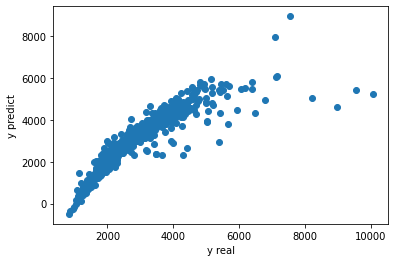

In [ ]:
plt.scatter(y_test, y_predi)
plt.xlabel('y real')
plt.ylabel('y predict')

In [ ]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_predi))
print('MSE:', metrics.mean_squared_error(y_test, y_predi))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_predi)))
print('R:', metrics.r2_score(y_test,y_predi))

MAE: 466.3557427850282
MSE: 420298.8673561615
RMSE: 648.3046100068714
R: 0.7284914444381301


In [ ]:
from sklearn.model_selection import cross_val_score

cross_val_score(lm1, X, y, cv=5).mean()

0.7515117306278023

#### **Normalizing**

In [ ]:
all_numeric = data[['QUANTITYORDERED',	'PRICEEACH',	'ORDERLINENUMBER',  'QTR_ID',	'MONTH_ID',	'YEAR_ID','MSRP', 'SALES']]

In [ ]:
scaler = MinMaxScaler()
all_numeric = scaler.fit_transform(all_numeric)

In [ ]:
df = pd.DataFrame(all_numeric, columns=['QUANTITYORDERED',	'PRICEEACH',	'ORDERLINENUMBER',  'QTR_ID',	'MONTH_ID',	'YEAR_ID','MSRP', 'SALES'])
df

QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER  ...  YEAR_ID      MSRP     SALES
0            0.263736   0.941193         0.058824  ...      0.0  0.342541  0.175644
1            0.307692   0.744940         0.235294  ...      0.0  0.342541  0.167916
2            0.384615   0.928063         0.058824  ...      0.0  0.342541  0.250150
3            0.428571   0.771061         0.294118  ...      0.0  0.342541  0.240030
4            0.472527   1.000000         0.764706  ...      0.0  0.342541  0.347273
...               ...        ...              ...  ...      ...       ...       ...
2818         0.153846   1.000000         0.823529  ...      0.5  0.116022  0.129572
2819         0.252747   1.000000         0.000000  ...      1.0  0.116022  0.257074
2820         0.406593   1.000000         0.176471  ...      1.0  0.116022  0.362882
2821         0.307692   0.483589         0.000000  ...      1.0  0.116022  0.120143
2822         0.450549   0.528446         0.470588  ...      1.0  0.116022  0.190969

[2823 rows x 8 columns]

In [ ]:
y = df['SALES']
X = df[['QUANTITYORDERED',	'PRICEEACH',	'ORDERLINENUMBER',  'QTR_ID',	'MONTH_ID',	'YEAR_ID','MSRP']]

In [ ]:
#In model we separate 20% to test and 80% to train.

X_train = X.iloc[:2259]
X_test = X.iloc[2259:2823]

y_train = y.iloc[:2259]
y_test = y.iloc[2259:2823]

In [ ]:
lm2 = LinearRegression()
lm2.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_predic = lm2.predict(X_test)
y_predic

array([ 0.18862583, -0.02398956,  0.20370151,  0.12371382,  0.20606077,
        0.11867515,  0.10933255,  0.1621688 ,  0.13123986,  0.18003119,
        0.15224067,  0.15953681,  0.13449024,  0.18161505,  0.11257207,
        0.07711107, -0.00110575,  0.23720318,  0.05224249,  0.05337975,
        0.06421835,  0.22370471,  0.21409954,  0.10828544,  0.24296798,
        0.13422131,  0.12738315,  0.15153065,  0.10762515,  0.21380013,
        0.00814647,  0.01898634,  0.16898694,  0.12665912,  0.1675316 ,
        0.09544123,  0.33590492,  0.14399756,  0.20251066,  0.24472746,
        0.15484709,  0.32863759,  0.08119662,  0.1945892 ,  0.14294352,
        0.10424577,  0.22223646,  0.07337066,  0.12450295,  0.14463726,
        0.01435457,  0.16393433,  0.24034904,  0.21903944,  0.07243295,
        0.30341113,  0.12317448,  0.22149818,  0.0392332 ,  0.09889795,
        0.15492523,  0.11669188,  0.27154435,  0.25575871,  0.23220012,
        0.04219201,  0.38160841,  0.0532579 ,  0.23267507,  0.16

Text(0, 0.5, 'y predict')

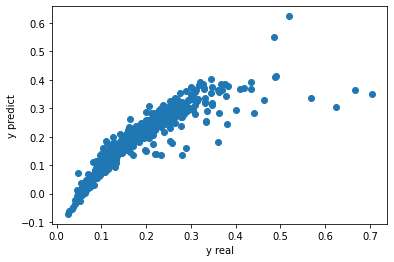

In [ ]:
plt.scatter(y_test, y_predic)
plt.xlabel('y real')
plt.ylabel('y predict')

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, y_predic))
print('MSE:', metrics.mean_squared_error(y_test, y_predic))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_predic)))
print('R:', metrics.r2_score(y_test,y_predic))

MAE: 0.03428917419399405
MSE: 0.0022721532148356678
RMSE: 0.04766710831208106
R: 0.7284914444381299


### **Selecting the best features**

In [ ]:
X.shape

(248, 7)

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
f_regression = SelectKBest(score_func=f_regression, k=4)
fit = f_regression.fit(X,y)
features = fit.transform(X)

# Visualizando as features:
print(features)

[[1.         0.430457   0.         0.09392265]
 [0.2        1.         0.0625     0.50276243]
 [0.86666667 1.         0.125      0.54696133]
 [0.46666667 1.         0.1875     0.59668508]
 [0.46666667 1.         0.625      0.75690608]
 [0.13333333 0.4657962  0.5625     0.14917127]
 [0.43333333 1.         0.4375     0.51933702]
 [0.1        1.         0.25       0.74585635]
 [0.73333333 0.91839341 0.0625     0.36464088]
 [0.33333333 0.40703946 0.125      0.11049724]
 [0.53333333 0.05180244 0.375      0.        ]
 [0.96666667 0.28015896 0.3125     0.06077348]
 [1.         1.         0.1875     0.38121547]
 [0.2        0.13397672 0.5        0.0441989 ]
 [0.         0.8661652  0.         0.35359116]
 [0.86666667 1.         0.3125     0.4640884 ]
 [0.73333333 0.10587567 0.0625     0.02209945]
 [0.6        0.83749645 0.1875     0.24309392]
 [1.         1.         0.25       0.45303867]
 [0.         1.         0.         0.75138122]
 [0.5        1.         0.125      0.59116022]
 [0.13333333 

In [ ]:
cols = fit.get_support(indices=True)
df.iloc[:,cols]

QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER      MSRP
0           1.000000   0.430457           0.0000  0.093923
1           0.200000   1.000000           0.0625  0.502762
2           0.866667   1.000000           0.1250  0.546961
3           0.466667   1.000000           0.1875  0.596685
4           0.466667   1.000000           0.6250  0.756906
..               ...        ...              ...       ...
243         0.833333   0.677689           0.3125  0.265193
244         0.333333   1.000000           0.5000  0.646409
245         0.800000   0.418961           0.1875  0.160221
246         0.366667   0.740704           0.3750  0.198895
247         0.766667   0.343741           0.0000  0.060773

[248 rows x 4 columns]

In [ ]:
X1 = df.iloc[:,cols]
X1

QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER      MSRP
0           1.000000   0.430457           0.0000  0.093923
1           0.200000   1.000000           0.0625  0.502762
2           0.866667   1.000000           0.1250  0.546961
3           0.466667   1.000000           0.1875  0.596685
4           0.466667   1.000000           0.6250  0.756906
..               ...        ...              ...       ...
243         0.833333   0.677689           0.3125  0.265193
244         0.333333   1.000000           0.5000  0.646409
245         0.800000   0.418961           0.1875  0.160221
246         0.366667   0.740704           0.3750  0.198895
247         0.766667   0.343741           0.0000  0.060773

[248 rows x 4 columns]

In [ ]:
X_train, X_test, y_train,y_test = train_test_split(X1, y, test_size=0.2,random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((198, 4), (50, 4), (198,), (50,))

In [ ]:
lm3 = LinearRegression()

lm3.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_p = lm3.predict(X_test)
y_p

array([ 0.00507945,  0.3945341 ,  0.08620304,  0.37363377,  0.29277212,
        0.1573322 ,  0.42102294,  0.39082014,  0.07084371, -0.10430352,
        0.23201392,  0.40353294, -0.00566393,  0.07614911,  0.64813114,
        0.21993338,  0.43227657,  0.48941439,  0.56800743,  0.2206012 ,
        0.30443022,  0.41554167,  0.40745199,  0.18037356,  0.34009536,
        0.48456977,  0.19224188,  0.03264482,  0.54529561,  0.19180512,
        0.3865873 ,  0.33239479,  0.14134459,  0.07485606,  0.23973893,
        0.52256229,  0.4652772 ,  0.10752357,  0.2579174 ,  0.54244367,
        0.25913356,  0.26916517,  0.22872878,  0.26468178,  0.1126665 ,
        0.22519823,  0.32473878,  0.33473196,  0.15861455,  0.33199381])

Text(0, 0.5, 'y predict')

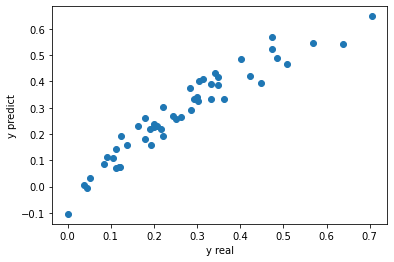

In [ ]:
plt.scatter(y_test, y_p)
plt.xlabel('y real')
plt.ylabel('y predict')

In [ ]:
# With the columns 'QUANTITYORDERED'	'PRICEEACH'	'ORDERLINENUMBER'	'MSRP' 'YEAR_ID'

from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_p))
print('MSE:', metrics.mean_squared_error(y_test, y_p))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_p)))
print('R:', metrics.r2_score(y_test,y_p))

MAE: 0.043080983121519305
MSE: 0.0028194585075759786
RMSE: 0.053098573498503505
R: 0.8851840956458167


In [ ]:
# With the columns 'QUANTITYORDERED'	'PRICEEACH'	'ORDERLINENUMBER'	'MSRP'
# With 4 columns is better than 5 columns

print('MAE:', metrics.mean_absolute_error(y_test, y_p))
print('MSE:', metrics.mean_squared_error(y_test, y_p))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_p)))
print('R:', metrics.r2_score(y_test,y_p))

MAE: 0.04244082075816027
MSE: 0.0027333991200532625
RMSE: 0.05228191962861791
R: 0.8886886644770433


#### **Without normalizing the data**

And using just the 4 better columns

In [ ]:
y = bronze['SALES']
X = bronze[['QUANTITYORDERED',	'PRICEEACH',	'ORDERLINENUMBER','MSRP']]

In [ ]:
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size=0.2,random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((198, 4), (50, 4), (198,), (50,))

In [ ]:
lm4 = LinearRegression()

lm4.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pr = lm4.predict(X_test)
y_pr

array([ 742.74356239, 4434.03364991, 1511.64101469, 4235.93819652,
       3469.5234429 , 2185.8103274 , 4685.09749426, 4398.83238775,
       1366.06381417, -293.99921795, 2893.65115984, 4519.32557401,
        640.91670952, 1416.34891377, 6837.65173618, 2779.15054031,
       4791.76051784, 5333.31850562, 6078.23120977, 2785.48020856,
       3580.02011146, 4633.14551492, 4556.47066232, 2404.1986436 ,
       3918.05779923, 5287.40074521, 2516.6877585 , 1004.01086806,
       5862.96635207, 2512.54807109, 4358.71305661, 3845.07104206,
       2034.27814194, 1404.09321785, 2966.86955669, 5647.49764806,
       5104.54382601, 1713.71919264, 3139.16694576, 5835.93533579,
       3150.69375649, 3245.77439624, 2862.51424631, 3203.28039456,
       1762.46435538, 2829.0513726 , 3772.50666295, 3867.22297151,
       2197.96459445, 3841.27050537])

Text(0, 0.5, 'y predict')

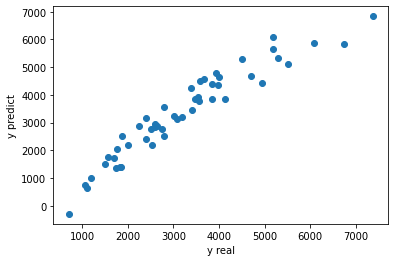

In [ ]:
plt.scatter(y_test, y_pr)
plt.xlabel('y real')
plt.ylabel('y predict')

In [ ]:
# With the columns 'QUANTITYORDERED'	'PRICEEACH'	'ORDERLINENUMBER'	'MSRP'

print('MAE:', metrics.mean_absolute_error(y_test, y_pr))
print('MSE:', metrics.mean_squared_error(y_test, y_pr))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pr)))
print('R:', metrics.r2_score(y_test,y_pr))

MAE: 402.2583432279187
MSE: 245553.21417650444
RMSE: 495.5332624320031
R: 0.8886886644770435


## **LightGBM to Regression**

In [ ]:
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import lightgbm as ltb

The params can be understand in 

https://lightgbm.readthedocs.io/en/latest/Parameters.html#parameters-format

In [ ]:
hyper_params = {
    'task': 'train',  #default
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': ['l1','l2','rmse'],
    'learning_rate': 0.005,  #shrinkage rate
    #'feature_fraction': 0.9,
    #'bagging_fraction': 0.7,
    #'bagging_freq': 10,
    'verbose': 1,  #show the training bar
    'max_depth': 48,  #limit the max depth for tree model. This is used to deal 
                      #with over-fitting when 
                      #data is small. Tree still grows leaf-wise
    'num_leaves': 64,  # max number of leaves in one tree
    'max_bin': 255,  #max number of bins that feature values will be bucketed in 
                    #small number of bins may reduce training accuracy but may 
                   #increase general power
    'num_iterations': 100000  #number of boosting iterations
}

In [ ]:
gbm = ltb.LGBMRegressor(**hyper_params)

In [ ]:
gbm.fit(X_train, y_train,
        eval_set=[(X_test, y_test)],
        eval_metric='l2',
        early_stopping_rounds=1000)

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	valid_0's l1: 0.131872	valid_0's rmse: 0.161801	valid_0's l2: 0.0261796
Training until validation scores don't improve for 1000 rounds.
[2]	valid_0's l1: 0.131318	valid_0's rmse: 0.161135	valid_0's l2: 0.0259646
[3]	valid_0's l1: 0.130791	valid_0's rmse: 0.160455	valid_0's l2: 0.0257457
[4]	valid_0's l1: 0.130242	valid_0's rmse: 0.159797	valid_0's l2: 0.0255351
[5]	valid_0's l1: 0.12972	valid_0's rmse: 0.159124	valid_0's l2: 0.0253205
[6]	valid_0's l1: 0.129177	valid_0's rmse: 0.158474	valid_0's l2: 0.0251141
[7]	valid_0's l1: 0.128636	valid_0's rmse: 0.157829	valid_0's l2: 0.0249099
[8]	valid_0's l1: 0.128121	valid_0's rmse: 0.157168	valid_0's l2: 0.0247017
[9]	valid_0's l1: 0.127586	valid_0's rmse: 0.15653	valid_0's l2: 0.0245016
[10]	valid_0's l1: 0.127075	valid_0's rmse: 0.155876	valid_0's l2: 0.0242975
[11]	valid_0's l1: 0.126556	valid_0's rmse: 0.155237	valid_0's l2: 0.0240985
[12]	valid_0's l1: 0.126028	valid_0's rmse: 0.154611	valid_0's l2: 0.0239044
[13]	valid_0's l1: 0.12

LGBMRegressor(learning_rate=0.005, max_bin=255, max_depth=48,
              metric=['l1', 'l2', 'rmse'], num_iterations=100000, num_leaves=64,
              objective='regression', task='train', verbose=1)

In [ ]:
# y_pred = gbm.predict(X_train, num_iteration=gbm.best_iteration_)

In [ ]:
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration_)

In [ ]:
# Basic RMSE
print('The rmse of prediction is:', np.sqrt(metrics.mean_squared_error(y_pred, y_test)))

The rmse of prediction is: 0.04532730141532432


In [ ]:
# print('MAE:', metrics.mean_absolute_error(y_pred, y_train))
# print('MSE:', metrics.mean_squared_error(y_pred, y_train))
# print('RMSE:', np.sqrt(metrics.mean_squared_error(y_pred, y_train)))
# print('R:', metrics.r2_score(y_pred, y_train))

MAE: 0.026176726962182383
MSE: 0.0019624862223500852
RMSE: 0.04429995736284726
R: 0.9478059088216306


In [ ]:
#with group "Bronze"

print('MAE:', metrics.mean_absolute_error(y_pred, y_test))
print('MSE:', metrics.mean_squared_error(y_pred, y_test))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_pred, y_test)))
print('R:', metrics.r2_score(y_pred, y_test))

MAE: 0.026489995020352774
MSE: 0.002054564253595662
RMSE: 0.04532730141532432
R: 0.9216567641044621


Text(0, 0.5, 'y predict')

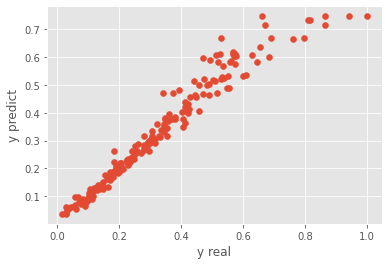

In [ ]:
plt.scatter(y_train, y_pred)
plt.xlabel('y real')
plt.ylabel('y predict')

##  **Conclusions of the project**

LightGBM provides a robust implementation of gradient boosting for decision trees. The training times are short and with minimal tuning, you can achieve excellent model accuracy.

Hyperparameter tuning should be applied. Currently, only a few parameters have been tried. The parameter space is large for LightGBM with numerous possibilities. 
